# Machine Learning Group Project - Group 50
## Masters in Data Science and Advanced Analytics at NOVA IMS, Lisbon

## Group Information
Group members: **<span style="color:red">(Everyone please check and correct the names)</span><br>**
Md. Shawkatul Islam Aziz<br>
Md. Tahir Hossain<br>
Philipp Metzger<br>
Ali Sabbir<br>
Henrique Vaz<br>

# **<span style="color:red">To do:</span><br>**
- Create and use something like the graph on the bottom right side (also the other ones maybe) of "8_EnsembleClassifiers" slide 36
- Check feature importance with all features for gradient boosting method
- Try ither type of scaler

## Import all libraries needed

**Post by Carina that specifies which libraries we are allowed to use**

Anúncios - About using other libraries in the Project
by Carina Albuquerque - Sunday, 29 November 2020, 4:58 PM

"Dear students,

as seems to have some confusion on what you can or not use related to libraries in the project, the rules are clear in Kaggle:

"You can only use Sklearn machine learning models (you can use other libraries for different purposes than modelling). If you use any algorithm or technique not presented on the practical classes, you should explain in detail how the algorithm / technique works in your report and explain the chosen configurations."

In that way, if you want to use XGBoost as some asked during the classes, and as explained,  you can only use this library for other reasons than modelling (you can use it for example for Feature Selection).



Best regards,

Carina Albuquerque"

In [1]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import time
from xgboost import XGBClassifier
from xgboost import plot_importance as xgb_plot_imp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

## Load the data

In [2]:
train = pd.read_excel(os.path.join('..', 'Data', 'Train.xlsx'), sheet_name='Sheet1', engine ='openpyxl')
test = pd.read_excel(os.path.join('..', 'Data', 'Test.xlsx'), sheet_name='Sheet1', engine = 'openpyxl')

## First exploration of the training set

In [3]:
# Show the first three rows of 'train'
train.head(3)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [4]:
# Get the dimensions of 'train'
train.shape

(22400, 15)

In [5]:
# Check the data types and check if there are missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [6]:
# Get the basic descriptive statistics on 'train'
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [7]:
# Find out the share of individuals with income higher than average and lower than average
higher = len(train.Income[train.Income==1])
lower = len(train.Income[train.Income==0])

percentage_higher = higher / len(train.Income) * 100
percentage_lower = lower / len(train.Income) * 100

print(round(percentage_higher,2), '% in the training set have a higher than average income.')
print(round(percentage_lower,2), '% in the training set have a lower than average income.')

23.71 % in the training set have a higher than average income.
76.29 % in the training set have a lower than average income.


**<span style="color:red">This means that the 'train' dataset is imbalanced in favor of class 0 ('lower than average')</span><br>**

In [8]:
# Define a function that assesses the class distribution in the target
def class_dist(target):
    """Takes a column with 0 and 1 values and returns their count and prints their percentages."""
    
    count = Counter(target)
    print('Number of rows:', count[0]+count[1])
    print("Percentage 0:", round(count[0]/(count[0]+count[1])*100, 4), '%')
    print("Percentage 1:", round(count[1]/(count[0]+count[1])*100, 4), '%')
    
    return count

class_dist(train.Income)

Number of rows: 22400
Percentage 0: 76.2902 %
Percentage 1: 23.7098 %


Counter({1: 5311, 0: 17089})

In [9]:
# Define a function that performs random oversampling on a training dataset
def rand_oversampling(X, y, sampling_strategy):
    """Takes a training dataset and a sampling strategy specification as input and performs random oversampling on it 
    and returns the resulting dataset."""
    
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
    
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    
    return X_over, y_over

## Transform 'Birthday' to datetime format and get the age in days relative to today

In [10]:
# Define a function that maps month names to their integers

def monthToInt(monthStr):

    return {
            'January' : 1,
            'February' : 2,
            'March' : 3,
            'April' : 4,
            'May' : 5,
            'June' : 6,
            'July' : 7,
            'August' : 8,
            'September' : 9, 
            'October' : 10,
            'November' : 11,
            'December' : 12
    }[monthStr]

In [11]:
# Define a function that checks if a year is a leap year
# Adapted from:
# https://www.programiz.com/python-programming/examples/leap-year

# "A leap year is exactly divisible by 4 except for century years (years ending with 00). 
# The century year is a leap year only if it is perfectly divisible by 400."

def is_leapyear(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [12]:
# Define a function that takes the information from column 'Birthday' and adds a column that contains the
# birthdays as datetime objects and another column that contains the age of the person in days relative to today (2020)

def add_Birthday_date_Age_days_rel_to_2020(df):
    
    # Make a copy
    df_copy = df.copy()
    
    # Get the year, month and day from Strings in 'Birthday'
    split = df_copy.Birthday.str.split(',', expand=True)
    year = split.iloc[:,1].astype(int)
    month_day = split.iloc[:,0].str.strip(to_strip=' ').str.split(' ', expand=True)
    day = month_day.iloc[:,1].astype(int)
    month = month_day.iloc[:,0]
    
    # Map month names to integers
    month = month.map(lambda x:monthToInt(x))
    
    # Build a dataframe containing the date values
    frame = {'year':year, 'month':month, 'day':day}
    birthday = pd.DataFrame(frame)
    
    # Create datetime objects from the date values
    # Some problems with leap years (see below)
    birthday_date = []
    for i in range(birthday.shape[0]):
    
        # Get the values for this row
        year_i = int(birthday.iloc[i,0])
        month_i = int(birthday.iloc[i,1])
        day_i = int(birthday.iloc[i,2])

        # Leap years are incorrectly defined for this dataset.
        # For example row 359: year 2022, month 2, day 29 is a birthday in this datase, but in reality it does not 
        # exist.
        # -> Decrease all days where month=2 and day=29 that aren't in a leap year by 1 day to be able to use 
        # datetime.date

        # Get True if this year is a leap year, else False
        leapyear = is_leapyear(year_i)

        if (~leapyear and month_i==2 and day_i==29):
            day_i = day_i - 1
        date = datetime.date(year_i, month_i, day_i)
        birthday_date.append(date)
        
    # Convert the list to a pandas series
    birthday_date = pd.Series(birthday_date)
    
    # Insert 'birthday_date' as new column 'Birthday_date'
    df_copy.insert(loc=3, column='Birthday_date', value=birthday_date)
    
    # Compute time differences to today (2020) and keep only the value in days
    now = date.today()
    age = now - df_copy.Birthday_date
    age_days = age.dt.days
    
    # Insert 'age_days' as 'Age_days_rel_to_2020'
    df_copy.insert(loc=4, column='Age_days_rel_to_2020', value=age_days)
    
    # Return the resulting dataframe
    return df_copy

In [13]:
# Use the function defined above to add columns 'Birthday_date' and 'Age_days_rel_to_2020' to 'train'
train_2 = add_Birthday_date_Age_days_rel_to_2020(train)

In [14]:
# For later (Outlier detection): Save 'Birthday_date' is a new variable 'birthdays'
birthdays = train_2['Birthday_date']

In [15]:
# Drop columns 'Birthday' and 'Birthday_date'
train_2 = train_2.drop(columns=['Birthday', 'Birthday_date'])

In [16]:
# Check the result
train_2.head(3)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6385,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,5446,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,4245,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [17]:
# Save 'train_2'as our new version
train = train_2

## Assess the existance of nan values and empty strings

In [18]:
# List the variables that have missing values and their missing value counts
train.isna().sum()[train.isna().sum()!=0]

Series([], dtype: int64)

In [19]:
# Get the total number of nan values
train.isna().sum()[train.isna().sum()!=0].sum()

0

In [20]:
# See how many duplicated observations exist
train.duplicated().sum()

0

In [21]:
# Replace " " by nans
train.replace(" ", np.nan, inplace=True)

In [22]:
# Get the total number of nan values once more
train.isna().sum()[train.isna().sum()!=0].sum()

0

## Compute and visualise the correlations between the metric features and the target

In [23]:
# Define metric features and target in one list
metric_features_and_target = ['Age_days_rel_to_2020','Years of Education','Working Hours per week','Money Received','Ticket Price','Income']

In [24]:
# Compute the correlation matrix of 'train'
corr_pearson = train_2[metric_features_and_target].corr(method='pearson')
corr_spearman = train_2[metric_features_and_target].corr(method='spearman')

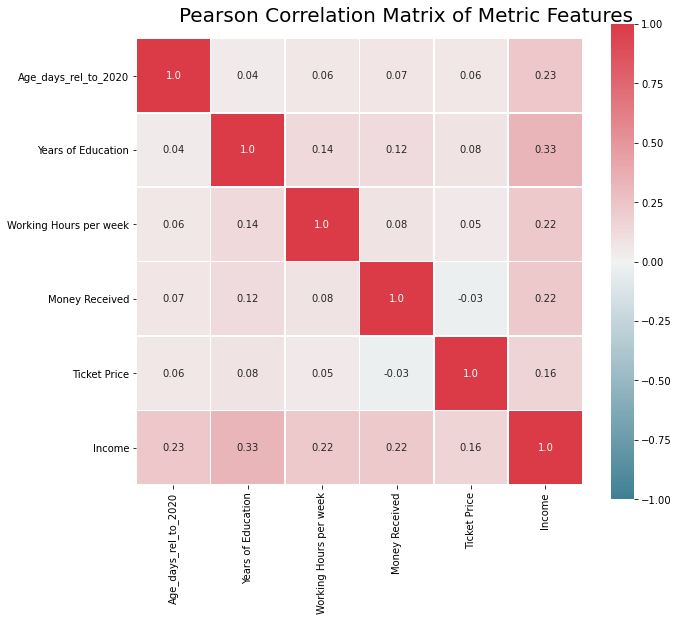

In [25]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix of Metric Features", fontsize=20)

plt.show()

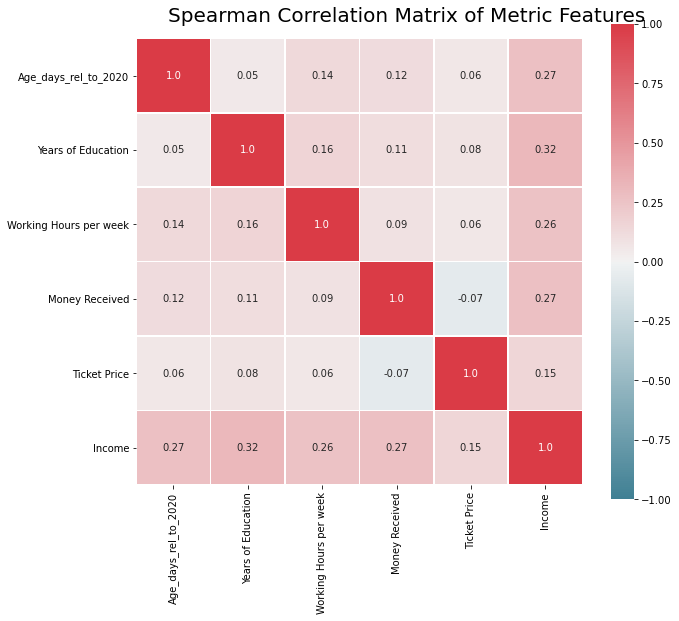

In [26]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix of Metric Features", fontsize=20)

plt.show()

## Assessing the discriminatory power of the categorical features

In [27]:
# Adapted from Machine learning lab "Feature Selection"
def bar_charts_categorical(df, feature, target, rotation):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.setp(ax1.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    ax2 = plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.setp(ax2.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$p$")

    plt.show()

### Discriminatory power of 'Native Continent'

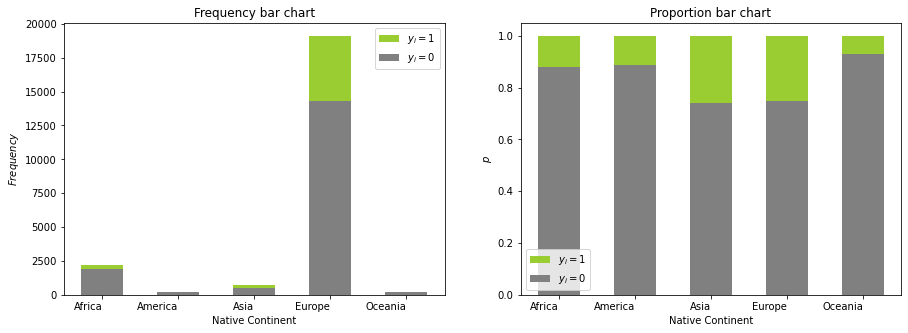

In [28]:
bar_charts_categorical(train, 'Native Continent', 'Income', 0)

### Discriminatory power of 'Marital Status'

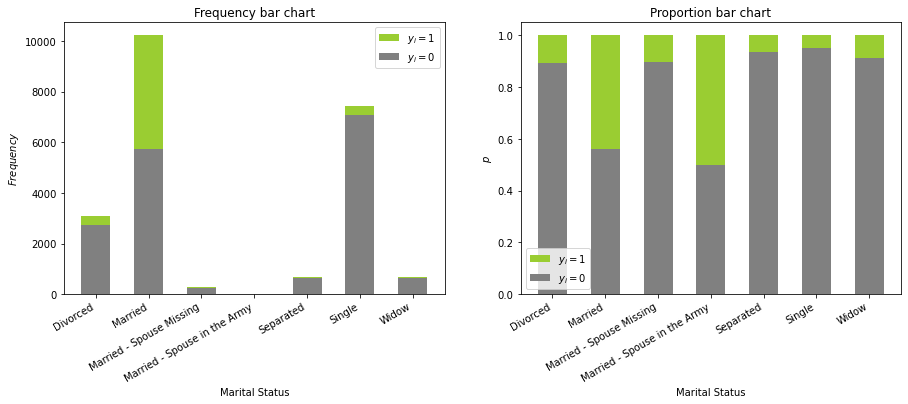

In [29]:
bar_charts_categorical(train, 'Marital Status', 'Income', 30)

### Discriminatory power of 'Lives with'

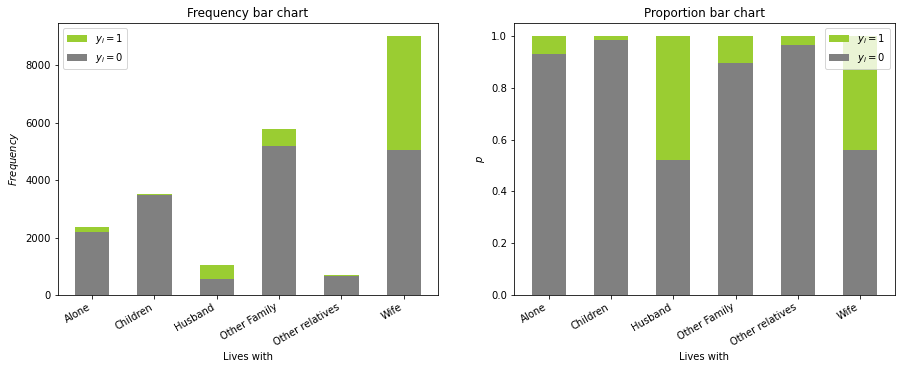

In [30]:
bar_charts_categorical(train, 'Lives with', 'Income', 30)

### Discriminatory power of 'Base Area'

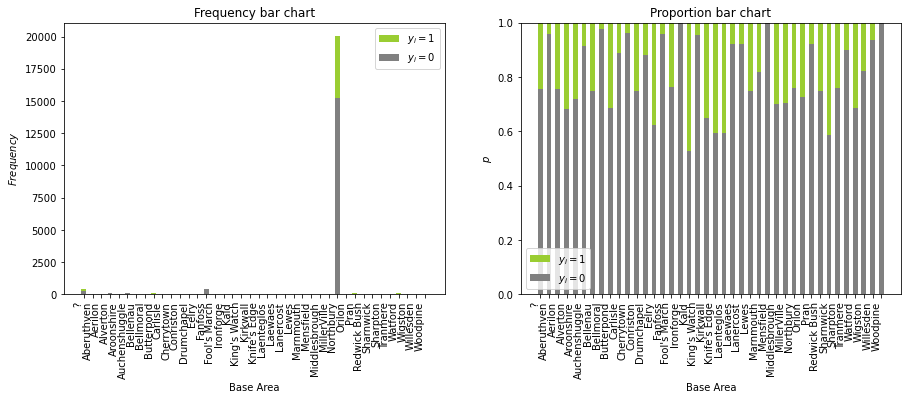

In [31]:
bar_charts_categorical(train, 'Base Area', 'Income', 90)

### Discriminatory power of 'Education Level'

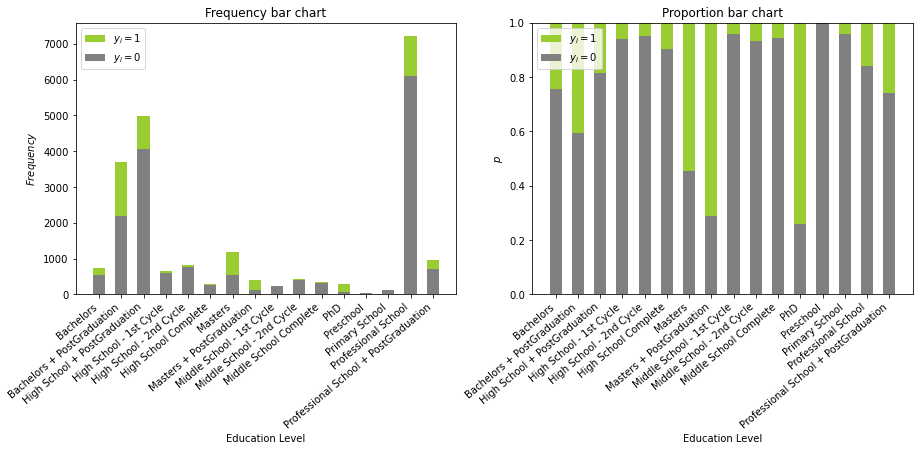

In [32]:
bar_charts_categorical(train, 'Education Level', 'Income', 40)

### Discriminatory power of  'Employment Sector'

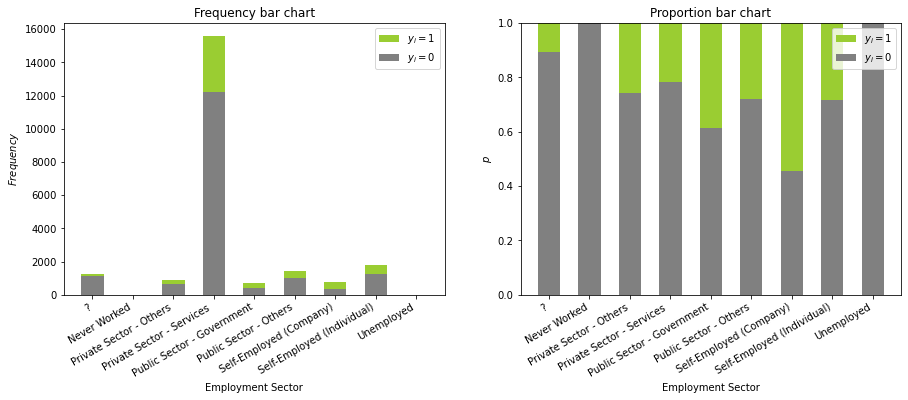

In [33]:
bar_charts_categorical(train, 'Employment Sector', 'Income', 30)

### Discriminatory power of  'Role'

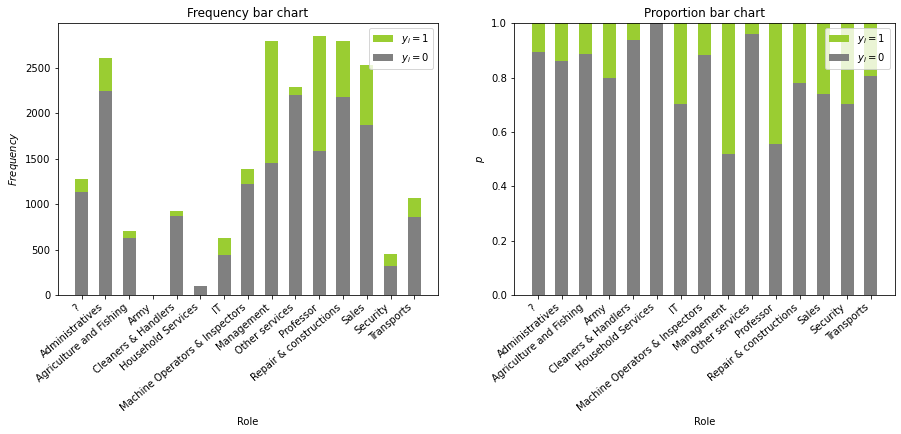

In [34]:
bar_charts_categorical(train, 'Role', 'Income', 40)

### Transform 'Ticket Price' into a binary variable and assess its discriminatory power

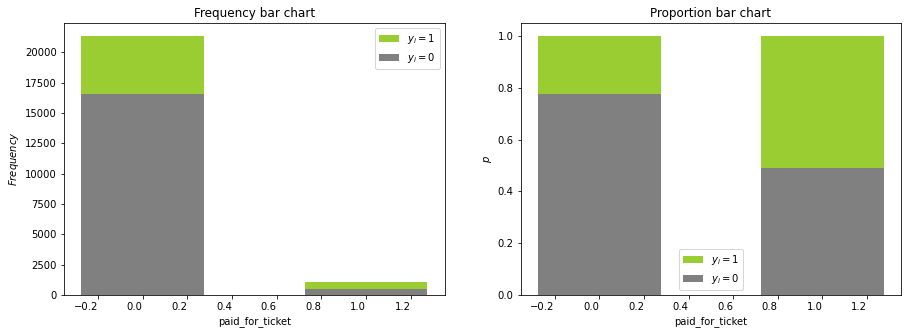

In [35]:
def make_binary(item):
    if item!=0:
        item=1
    return item

paid_for_ticket = train['Ticket Price'].map(lambda x:make_binary(x))
train_copy = train.copy()
train_copy.insert(loc=train_copy.shape[1]-1 , column='paid_for_ticket', value=paid_for_ticket)

bar_charts_categorical(train_copy, 'paid_for_ticket', 'Income', 0)

## One-hot encode categorical features

In [36]:
# Define a function that replaces a column by a set of columns
def replace_col(df, col_name, new_cols):
    df_copy = df.copy()
    col_index = df_copy.columns.get_loc(col_name)
    df_copy = df_copy.drop(columns=col_name)
    for col in range(new_cols.shape[1]):
        df_copy.insert(loc=col_index+col, column=list(new_cols)[col], value=new_cols.iloc[:,col])
    return df_copy    

In [37]:
# Define a function that one-hot encodes a column
def one_hot_encode(df, col_name, prefix):
    
    df_copy = df.copy()
    
    # Print the unique values to be one-hot encoded
    print('Unique values to be one-hot encoded:')
    print(pd.unique(df_copy[col_name]))
    
    # Compute dummy matrix
    y = pd.get_dummies(df_copy[col_name], prefix=prefix, dtype=float)
    
    if False:
        # Keeping all five variables would lead to one column being exactly the negation of the sum of the 
        # other columns. Show this:
        a = y.iloc[:,0]
        for col in range(1, y.shape[1]-1):
            a_=y.iloc[:,col]
            a=a+a_
        b=y.iloc[:, y.shape[1]-1]
        print()
        print('Correlation matrix of the sum of the first n-1 dummy features with the n-th dummy feature:')
        print(np.corrcoef(a.values,b.values))
    
    # Discard the last dummy column because of this (See code block above)
    y = y.drop(list(y)[y.shape[1]-1], axis=1)
    
    # Print the column that was discarded
    print()
    print('Column dropped (Case for which all dummy values = 0):')
    print(list(y)[y.shape[1]-1])
    
    # Use 'replace_col'
    df_copy = replace_col(df_copy, col_name, y)
    
    # Return the result
    return df_copy

### One-hot encode 'Native Continent'

In [38]:
# Use 'one_hot_encode' on 'Native Continent'
train_3 = one_hot_encode(train_2, 'Native Continent', 'Native_Continent')

Unique values to be one-hot encoded:
['Europe' 'Africa' 'Asia' 'America' 'Oceania']

Column dropped (Case for which all dummy values = 0):
Native_Continent_Europe


In [39]:
# Print the column labels of the resulting dataframe
list(train_3)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital Status',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Marital Status'

In [40]:
# Use 'one_hot_encode' on 'Marital Status'
train_4 = one_hot_encode(train_3, 'Marital Status', 'Marital_Status')

Unique values to be one-hot encoded:
['Married' 'Single' 'Married - Spouse Missing' 'Divorced' 'Separated'
 'Widow' 'Married - Spouse in the Army']

Column dropped (Case for which all dummy values = 0):
Marital_Status_Single


In [41]:
# Print the column labels of the resulting dataframe
list(train_4)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Lives with'

In [42]:
# Use 'one_hot_encode' on 'Lives with'
train_5 = one_hot_encode(train_4, 'Lives with', 'Lives_with')

Unique values to be one-hot encoded:
['Wife' 'Other Family' 'Children' 'Other relatives' 'Alone' 'Husband']

Column dropped (Case for which all dummy values = 0):
Lives_with_Other relatives


In [43]:
# Print the column labels of the resulting dataframe
list(train_5)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Base Area'

In [44]:
# Use 'one_hot_encode' on 'Base Area'
train_6 = one_hot_encode(train_5, 'Base Area', 'Base_Area')

Unique values to be one-hot encoded:
['Northbury' 'Auchenshuggle' 'Sharnwick' 'Laewaes' 'MillerVille' '?'
 'Fanfoss' 'Wigston' "Knife's Edge" 'Aerilon' 'Watford' 'Lanercost'
 'Bellmoral' 'Marnmouth' 'Bellenau' 'Butterpond' 'Laenteglos' 'Tranmere'
 'Eelry' 'Alverton' 'Pran' 'Willesden' "King's Watch" 'Kald' 'Kirkwall'
 "Fool's March" 'Middlesbrough' 'Orilon' 'Aroonshire' 'Aberuthven'
 'Sharpton' 'Lewes' 'Mensfield' 'Cherrytown' 'Redwick Bush' 'Drumchapel'
 'Carlisle' 'Conriston' 'Woodpine' 'Ironforge']

Column dropped (Case for which all dummy values = 0):
Base_Area_Willesden


In [45]:
# Print the column labels of the resulting dataframe
list(train_6)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

### One-hot encode 'Employment Sector'

In [46]:
# Use 'one_hot_encode' on 'Employment Sector'
train_7 = one_hot_encode(train_6, 'Employment Sector', 'Employment_Sector')

Unique values to be one-hot encoded:
['Private Sector - Services ' 'Public Sector - Others'
 'Self-Employed (Individual)' 'Private Sector - Others' '?'
 'Self-Employed (Company)' 'Public Sector - Government' 'Unemployed'
 'Never Worked']

Column dropped (Case for which all dummy values = 0):
Employment_Sector_Self-Employed (Individual)


In [47]:
# Print the column labels of the resulting dataframe
list(train_7)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

### One-hot encode 'Role'

In [48]:
# Use 'one_hot_encode' on 'Role'
train_8 = one_hot_encode(train_7, 'Role', 'Role')

Unique values to be one-hot encoded:
['Repair & constructions' 'Sales' 'Security' 'Professor'
 'Cleaners & Handlers' 'Other services' 'Machine Operators & Inspectors'
 'Management' 'Administratives' 'Transports' '?' 'Agriculture and Fishing'
 'IT' 'Household Services' 'Army']

Column dropped (Case for which all dummy values = 0):
Role_Security


In [49]:
# Print the column labels of the resulting dataframe
list(train_8)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

## Encoding 'Education Level'
**With 'Education Level' One-Hot Encoding is not appropriate since there is a meaningful order to the different levels of education**

In [50]:
# Creating a classification for the education level. First we'll check the values
set(list(train_8['Education Level']))

{'Bachelors',
 'Bachelors + PostGraduation',
 'High School + PostGraduation',
 'High School - 1st Cycle',
 'High School - 2nd Cycle',
 'High School Complete',
 'Masters',
 'Masters + PostGraduation',
 'Middle School - 1st Cycle',
 'Middle School - 2nd Cycle',
 'Middle School Complete',
 'PhD',
 'Preschool',
 'Primary School',
 'Professional School',
 'Professional School + PostGraduation'}

In [51]:
# Since the results represent a gradient and there are different levels of time investment in them we can classify
# them from lowest to largest

# Create a dictionary with the classification according to 'National Center for Education Statistics'
edu_classification = {1 : 'Preschool',
                      2 : 'Primary School',
                      3 : 'Middle School - 1st Cycle',
                      4 : 'Middle School - 2nd Cycle',
                      5 : 'Middle School Complete',
                      6 : 'High School - 1st Cycle',
                      7 : 'High School - 2nd Cycle',
                      8 : 'Professional School',
                      9 : 'High School Complete',
                      10 : 'Professional School + PostGraduation',
                      11 : 'High School + PostGraduation',
                      12 : 'Bachelors',
                      13 : 'Bachelors + PostGraduation',
                      14 : 'Masters',
                      15 : 'Masters + PostGraduation',
                      16 : 'PhD'
}

In [52]:
# Now we will create an auxiliar function that receives a level and assigns its corresponding classification 

def edu_classifier(level, classifier = edu_classification):
    """This funtion receives a level of education and a dictionary with education levels classification and returns
    the classification of a given level of education."""
    # List all the classifications in a specific order
    classif = list(edu_classification.keys())
    # List the education levels in the same order than the classifications
    edu_level = list(edu_classification.values())
    # Get the value where the given level's index does match in both lists
    return classif[edu_level.index(level)]

In [53]:
# Create a new column in the dataset using the classifications

# Apply 'edu_classifier' and convert the result to a single column dataframe
education_level_classified = train_8['Education Level'].apply(edu_classifier)
education_level_classified = education_level_classified.rename('Education_Level_Classified')
education_level_classified = pd.DataFrame(education_level_classified)

# Use 'replace_col'
train_9 = replace_col(train_8, 'Education Level', education_level_classified)

# Check the resulting new column
train_9[['Education_Level_Classified']].head()

,Education_Level_Classified
0,11
1,8
2,8
3,7
4,16


In [54]:
# Check all resulting column names
list(train_9)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

In [55]:
train_encoded = train_9
train_encoded

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,...,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6385,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,40,0,2273,1
1,12487,Mr. Cameron McDonald,5446,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,40,0,0,1
2,12488,Mr. Keith Davidson,4245,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,46,0,2321,1
3,12489,Mr. Alexander Gill,13057,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,37,5395,0,1
4,12490,Mr. Neil Piper,2035,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,-812,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40,0,0,0
22396,34882,Mr. Julian Coleman,-1535,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,35,0,0,0
22397,34883,Miss Amelia Walker,-574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,40,2674,0,0
22398,34884,Mr. Justin Sutherland,3483,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,90,0,0,1


## Feature Selection

In [56]:
train_encoded.corr()

,CITIZEN_ID,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,...,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,1.000000,0.010138,0.003506,-0.003728,-0.006893,0.000847,-0.005248,0.004005,0.010529,-0.004138,...,-0.000908,0.003279,-0.002506,0.000831,-0.008645,0.004470,-0.006226,0.008200,-0.005254,-0.001914
Age_days_rel_to_2020,0.010138,1.000000,-0.025684,-0.008701,-0.011803,0.039511,0.135152,0.311321,0.012264,-0.010416,...,0.097680,-0.089084,0.048710,0.009079,-0.034292,0.004465,0.064918,0.072770,0.055792,0.233070
Native_Continent_Africa,0.003506,-0.025684,1.000000,-0.032684,-0.059035,-0.792901,0.015333,-0.131574,0.020530,-0.008226,...,-0.051451,0.086788,-0.047922,-0.046827,-0.029033,0.036517,-0.058433,-0.018898,-0.022299,-0.091428
Native_Continent_America,-0.003728,-0.008701,-0.032684,1.000000,-0.017833,-0.239520,0.014463,-0.018136,0.021182,-0.002485,...,-0.007337,0.000960,-0.012057,0.002298,-0.011100,-0.001292,-0.006343,-0.005958,-0.013225,-0.028723
Native_Continent_Asia,-0.006893,-0.011803,-0.059035,-0.017833,1.000000,-0.432622,-0.035724,0.015523,0.039329,-0.004488,...,-0.000995,0.012409,0.033210,-0.022702,-0.005662,-0.012887,-0.005338,0.012960,0.002866,0.009218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Role_Security,0.004470,0.004465,0.036517,-0.001292,-0.012887,-0.024206,-0.004361,0.033032,-0.010538,-0.003581,...,-0.054085,-0.048282,-0.054658,-0.054063,-0.051103,1.000000,0.026706,-0.007138,-0.000621,0.020428
Working Hours per week,-0.006226,0.064918,-0.058433,-0.006343,-0.005338,0.056703,0.031900,0.204864,-0.000980,-0.011230,...,0.137650,-0.159432,0.063207,0.056685,0.008407,0.026706,1.000000,0.075471,0.052959,0.219890
Money Received,0.008200,0.072770,-0.018898,-0.005958,0.012960,0.012312,-0.020187,0.085617,-0.004663,-0.001221,...,0.062633,-0.038512,0.081048,-0.023997,0.010553,-0.007138,0.075471,1.000000,-0.031330,0.221440
Ticket Price,-0.005254,0.055792,-0.022299,-0.013225,0.002866,0.023740,-0.027682,0.080798,-0.006742,-0.005457,...,0.045167,-0.040903,0.050977,0.000778,0.004487,-0.000621,0.052959,-0.031330,1.000000,0.155890


In [57]:
# Create a new correlation matrix with new features
new_metric_features_and_target = ['Age_days_rel_to_2020','Years of Education','Working Hours per week','Money Received','Ticket Price','Education_Level_Classified','Income']

In [58]:
# Compute the correlation matrix of 'train'
corr_pearson = train_encoded[new_metric_features_and_target].corr(method='pearson')
corr_spearman = train_encoded[new_metric_features_and_target].corr(method='spearman')

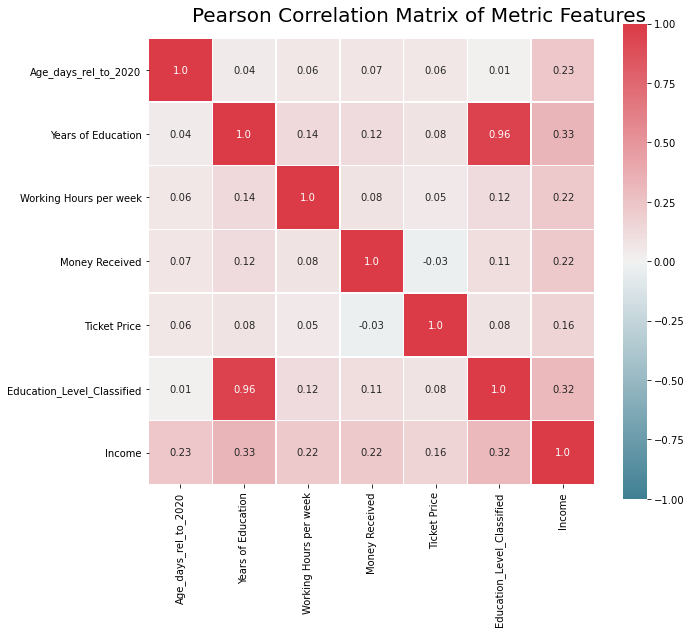

In [59]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix of Metric Features", fontsize=20)

plt.show()

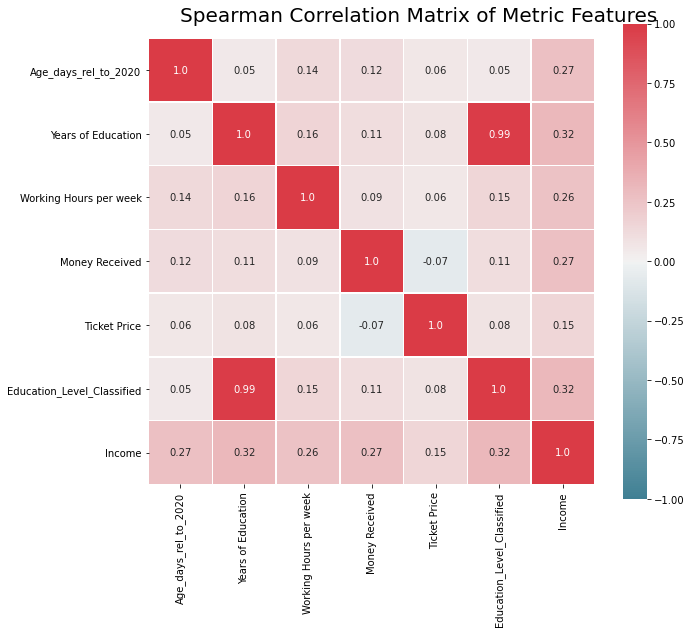

In [60]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix of Metric Features", fontsize=20)

plt.show()

In [61]:
# Take a look at the columns we have
list(train_encoded)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

#### Based on the discriminatory analysis made above we can also try to remove some variable on a first approach and check the results.

We will for now remove 'Native Continent' related variables and the same for 'Base Area' since there doesn't seem to be much influence on the target variable caused by these two.

In [62]:
# Create a list with the columns to remove
columns_to_remove = ['Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_Laenteglos',
 'Base_Area_Laewaes',
 'Base_Area_Lanercost',
 'Base_Area_Lewes',
 'Base_Area_Marnmouth',
 'Base_Area_Mensfield',
 'Base_Area_Middlesbrough',
 'Base_Area_MillerVille',
 'Base_Area_Northbury',
 'Base_Area_Orilon',
 'Base_Area_Pran',
 'Base_Area_Redwick Bush',
 'Base_Area_Sharnwick',
 'Base_Area_Sharpton',
 'Base_Area_Tranmere',
 'Base_Area_Watford',
 'Base_Area_Wigston',
 'Base_Area_Willesden',
]

In [63]:
# Remove the columns
train_encoded.drop(columns = columns_to_remove, inplace = True)

# Check the result
train_encoded.head()

,CITIZEN_ID,Name,Age_days_rel_to_2020,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,Marital_Status_Separated,Marital_Status_Single,Lives_with_Alone,...,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,40,0,2273,1
1,12487,Mr. Cameron McDonald,5446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,40,0,0,1
2,12488,Mr. Keith Davidson,4245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,46,0,2321,1
3,12489,Mr. Alexander Gill,13057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,37,5395,0,1
4,12490,Mr. Neil Piper,2035,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45,0,0,1


In [64]:
# Compute the correlation matrix of 'train_data'
corr_pearson = train_encoded.corr(method='pearson')

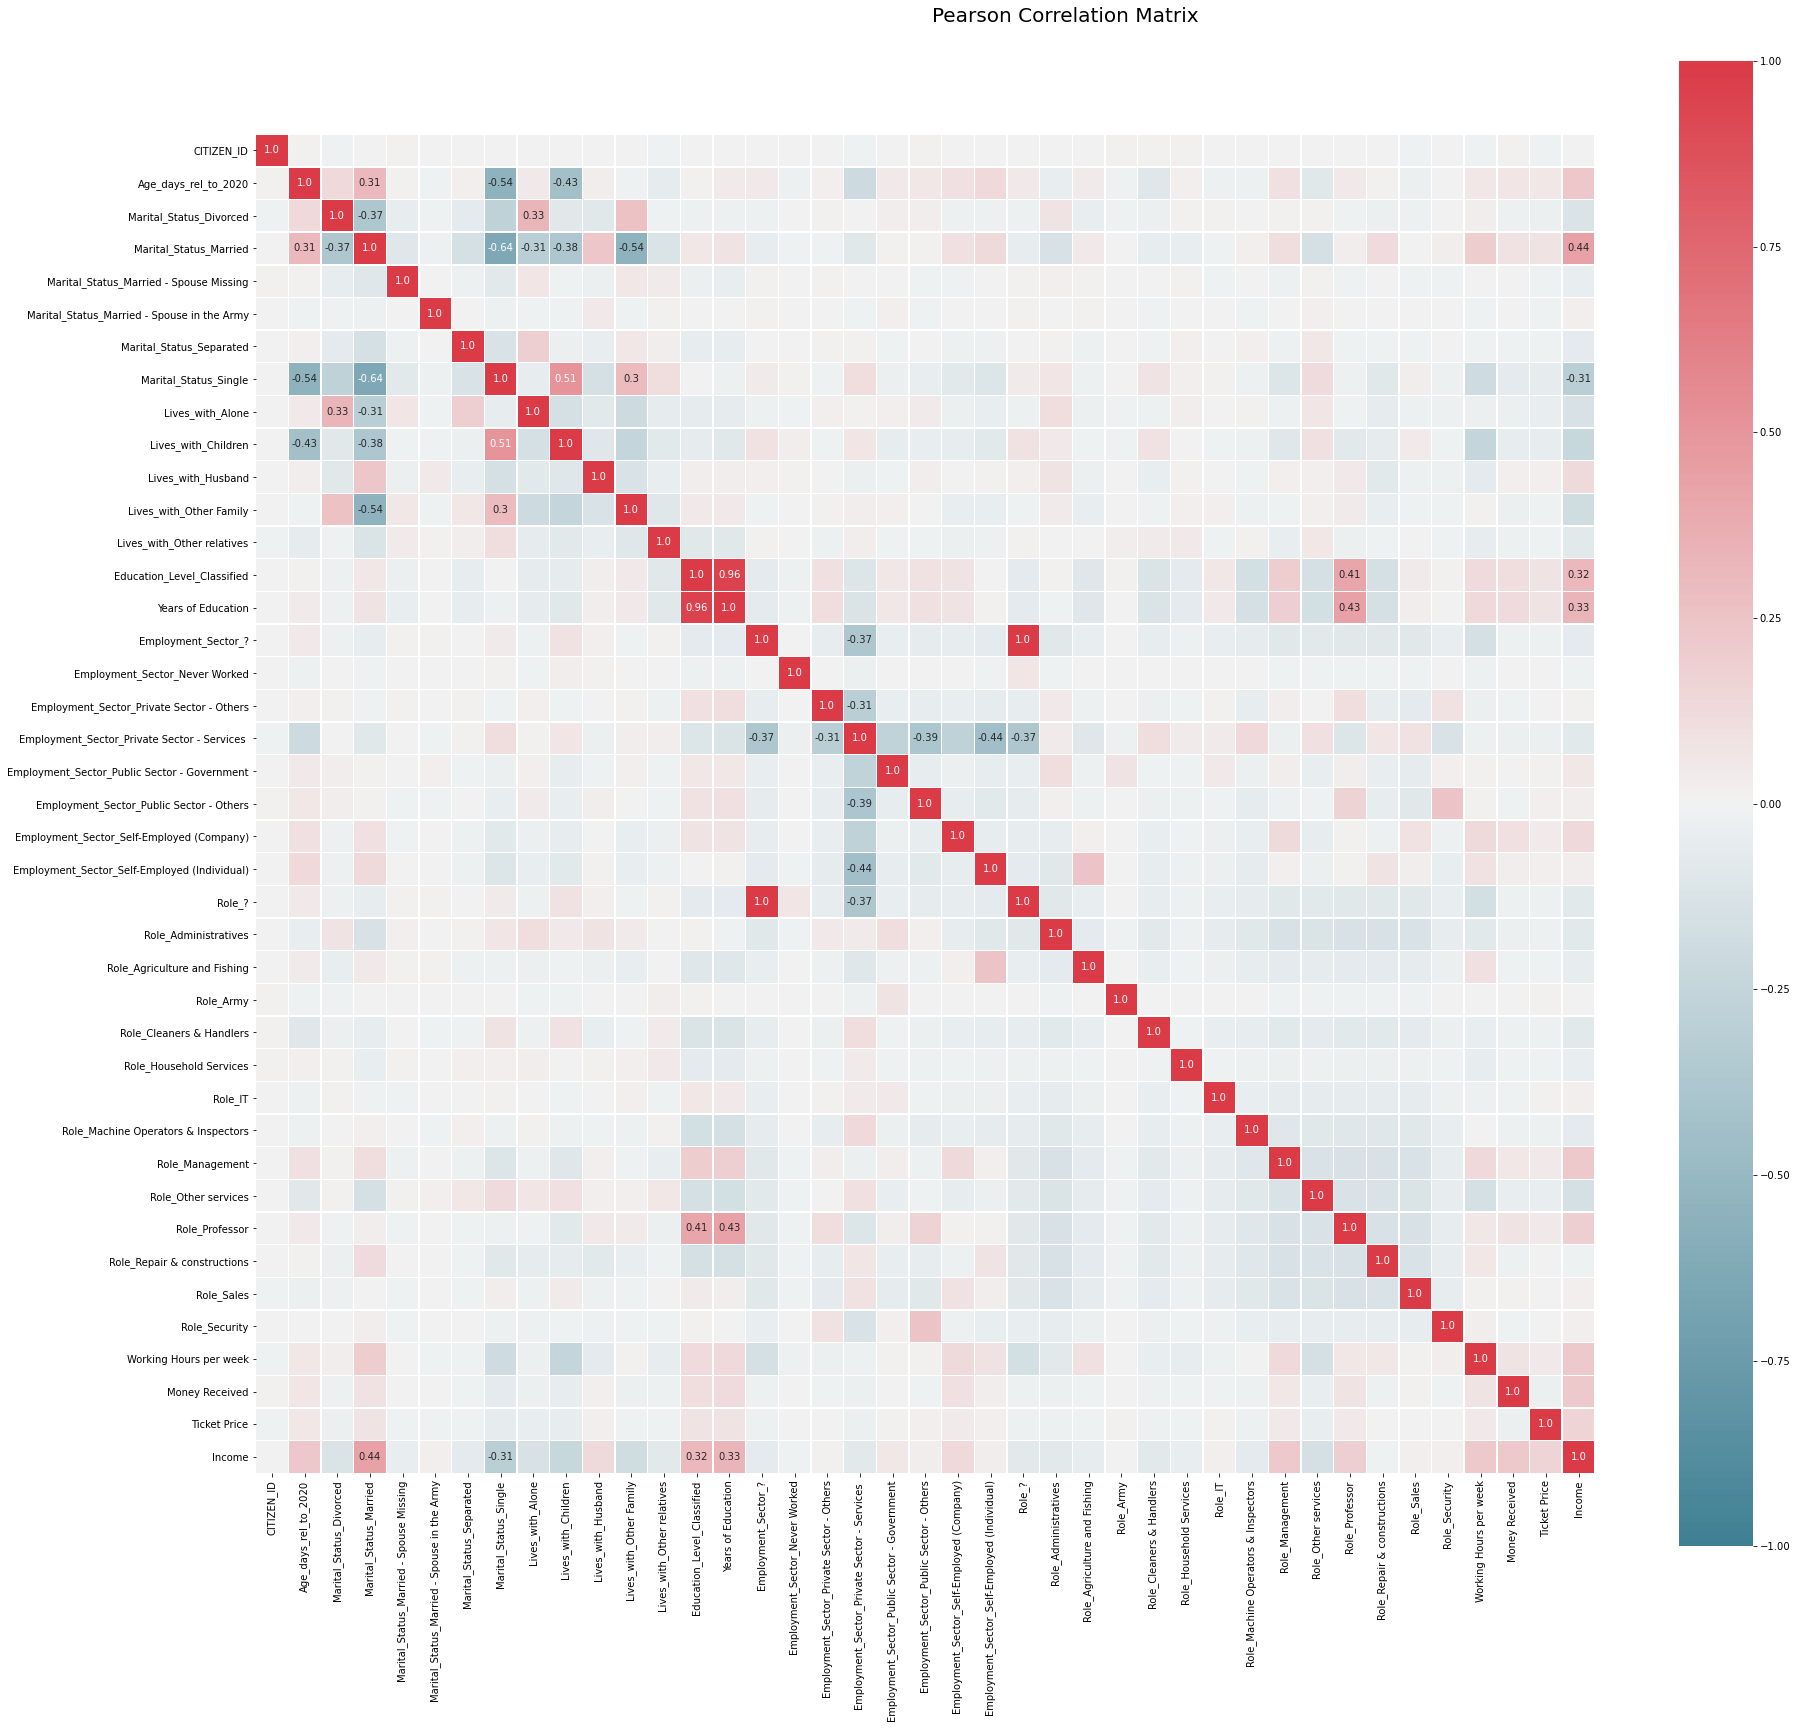

In [65]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.3
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

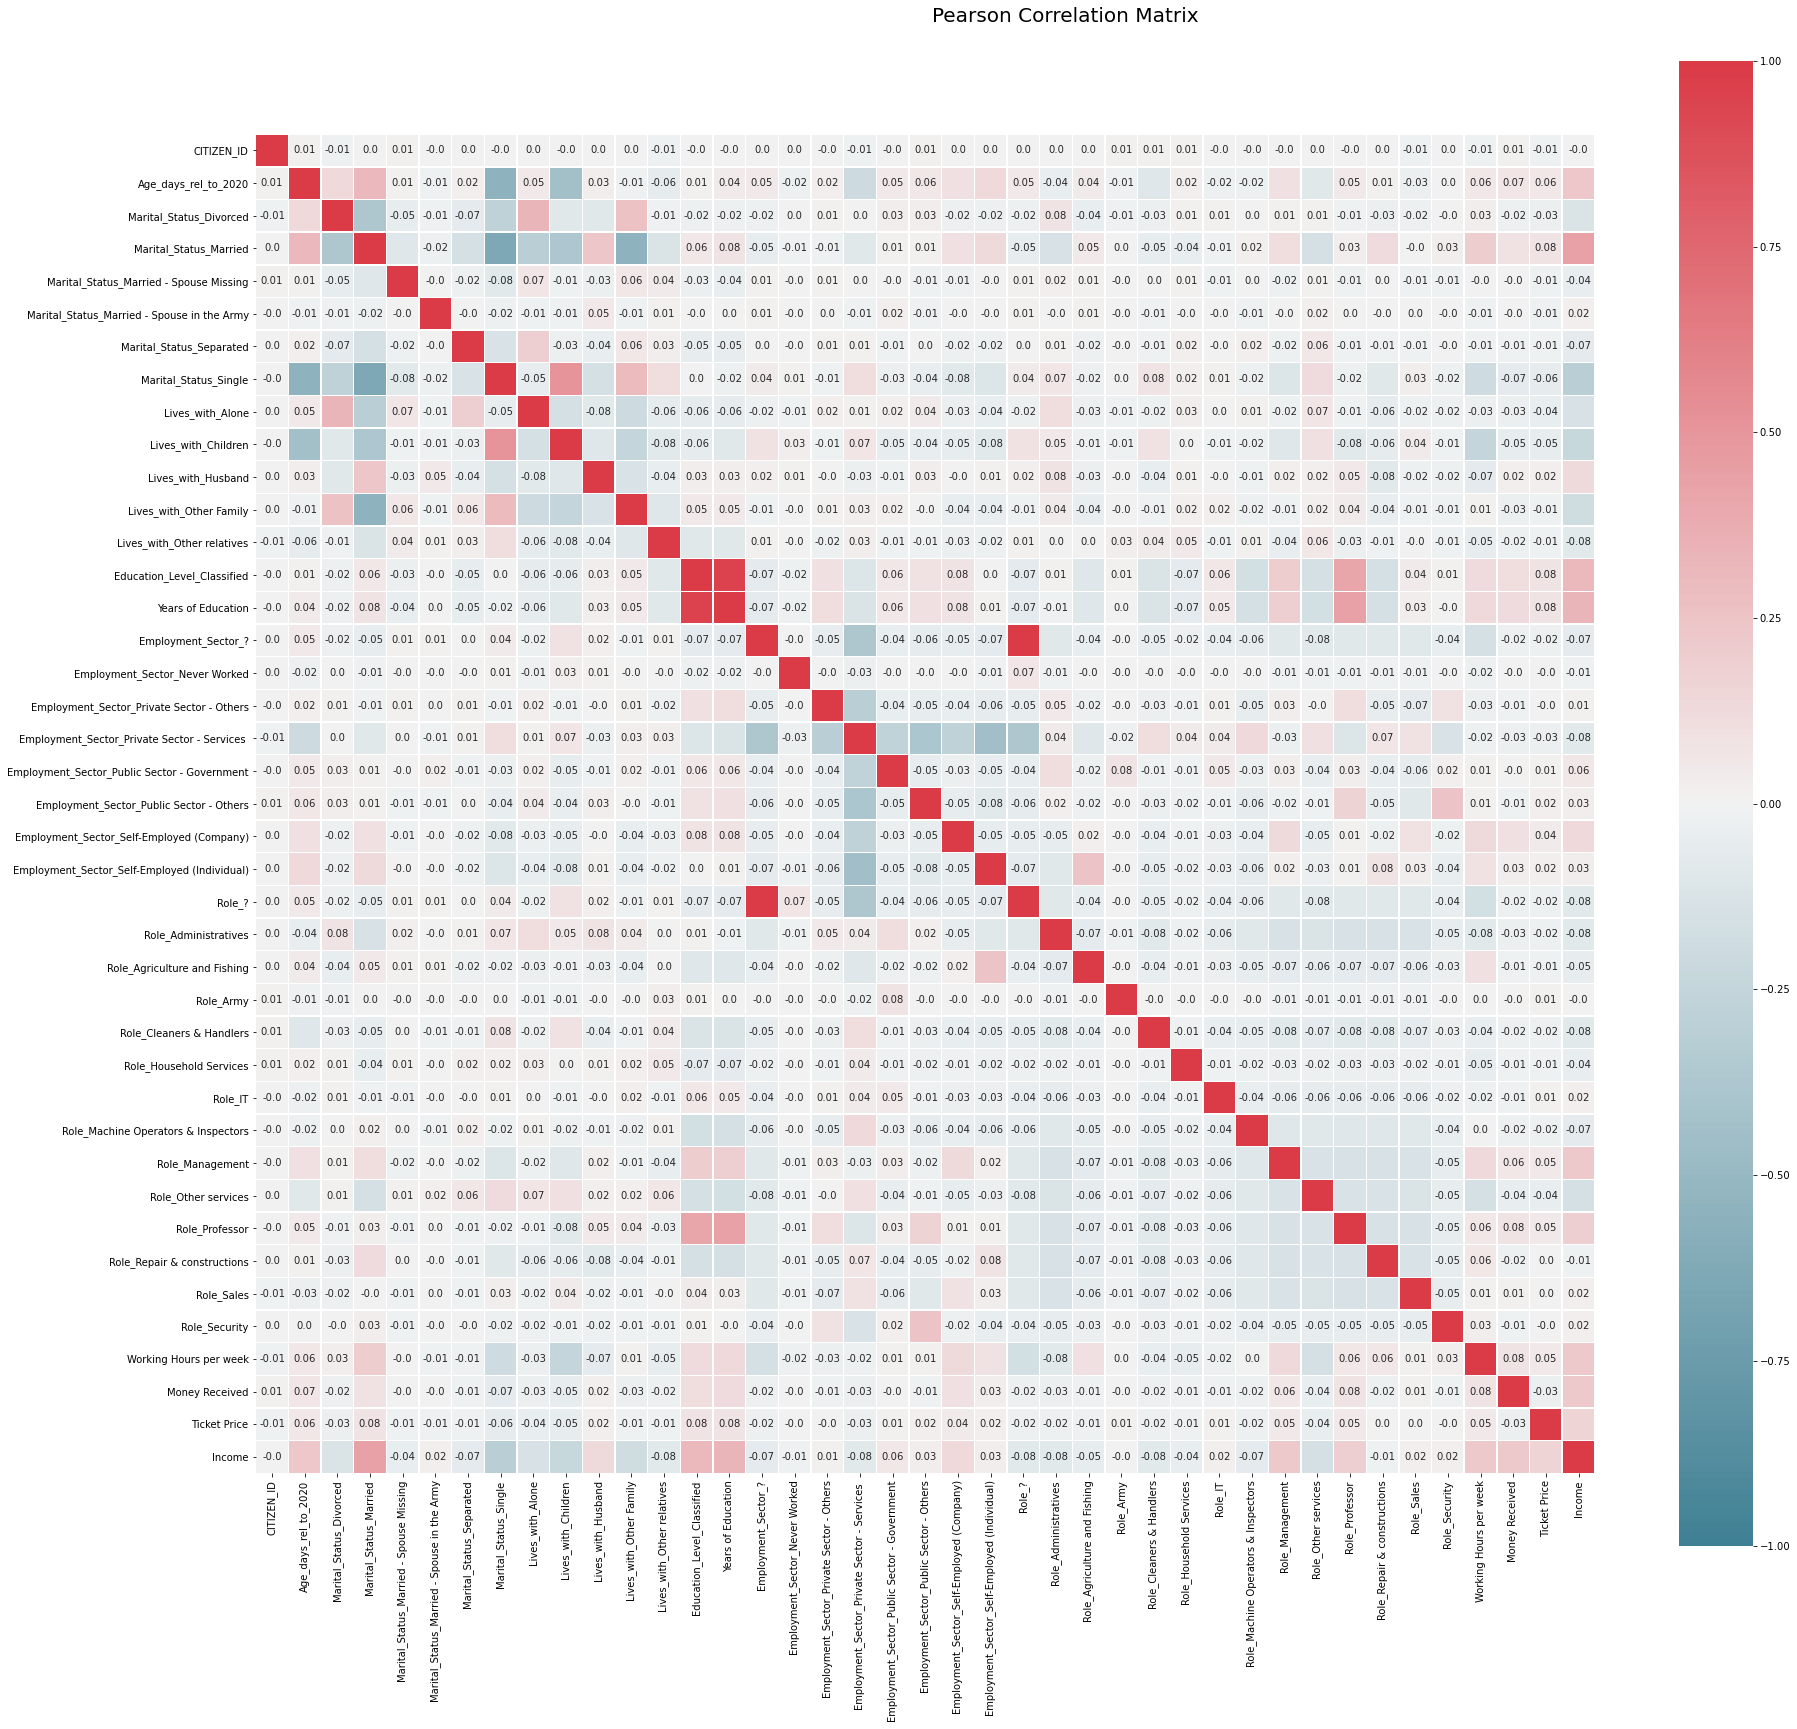

In [66]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.08
mask_annot = np.absolute(corr_rounded.values) <= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

From the analysis of the 2 plots above we can always remove one of two highly correlated features, in order not to bring redundancy to our model.

High Correlations:
1. Role_? / Employment_Sector_? --> corr = 1
2. Years_of_Education / Edu_Level_Classified --> corr = 0.96
3. Marital_Status_Married / Marital_Status_Single --> corr = -0.64

From these pairs we'll try keeping:
1. Role - It has higher correlation to our target variable
2. Edu_Level_Classified - It is more clearly informative and accurate
3. Marital_Status_Married - It has higher correlation to our target variable

At this point we're also eliminating features that have a correlation to the target lower than 0.1.

As a result of this, we end up with 16 features.

In [67]:
# Create a list with the features to keep now based on the matrices
features_to_keep_1 = ['Age_days_rel_to_2020',
                    'Marital_Status_Married',
                    'Marital_Status_Single',
                    'Marital_Status_Divorced',
                    'Lives_with_Children',
                    'Lives_with_Husband',
                    'Lives_with_Alone',
                    'Lives_with_Other Family',
                    'Role_Management',
                    'Role_Other services',
                    'Role_?',
                    'Role_Administratives',
                    'Role_Cleaners & Handlers',
                    'Role_Professor',
                    'Working Hours per week',
                    'Money Received',
                    'Ticket Price',
                    'Education_Level_Classified',
                    'Employment_Sector_Self-Employed (Company)',
                    'Employment_Sector_Private Sector - Services '
                   ]

In [68]:
# Separate our data and target

# Exclude the id and the name
train_data = train_encoded.drop(columns = {'Income'}).iloc[:, 2:]

# Include only the target
train_target = train_encoded['Income']

In [69]:
# Create a dataset with those features
train_data_selected_1 = train_data[features_to_keep_1]

### RFE 

In [72]:
import warnings
warnings.filterwarnings('ignore')

#no of features
nof_list=np.arange(1,len(train_data_selected_1.columns)+1)  
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    # we are going to see in the next class this "train_test_split()"...
    X_train, X_test, y_train, y_test = train_test_split(train_data_selected_1, train_target, test_size = 0.3, random_state = 0)
    
    model = GradientBoostingClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.860565


In [73]:
# Create the rfe instance with the speficied optimal number of features
rfe = RFE(estimator = model, n_features_to_select = nof)

In [75]:
# Fit and transform that instance applying it to our data
X_rfe = rfe.fit_transform(X = train_data_selected_1, y = train_target)

In [77]:
# Check which features were selected
selected_features = pd.Series(rfe.support_, index = train_data_selected_1.columns)
selected_features

Age_days_rel_to_2020                             True
Marital_Status_Married                           True
Marital_Status_Single                           False
Marital_Status_Divorced                         False
Lives_with_Children                             False
Lives_with_Husband                               True
Lives_with_Alone                                False
Lives_with_Other Family                         False
Role_Management                                  True
Role_Other services                              True
Role_?                                          False
Role_Administratives                            False
Role_Cleaners & Handlers                        False
Role_Professor                                   True
Working Hours per week                           True
Money Received                                   True
Ticket Price                                     True
Education_Level_Classified                       True
Employment_Sector_Self-Emplo

In [79]:
# See the results in a dataframe
selected_features = pd.DataFrame(rfe.support_, index = train_data_selected_1.columns)
selected_features.columns = ['Important']
selected_features

,Important
Age_days_rel_to_2020,True
Marital_Status_Married,True
Marital_Status_Single,False
Marital_Status_Divorced,False
Lives_with_Children,False
Lives_with_Husband,True
Lives_with_Alone,False
Lives_with_Other Family,False
Role_Management,True
Role_Other services,True


### Ridge Classifier

In [82]:
# Adapted from 'Tugas - Feature Selection'
# Using a Ridge Classfier to inspect feature importance
ridge = RidgeClassifierCV().fit(X = train_data_selected_1,y = train_target)
coef_ridge = pd.Series(ridge.coef_[0], index = train_data_selected_1.columns)

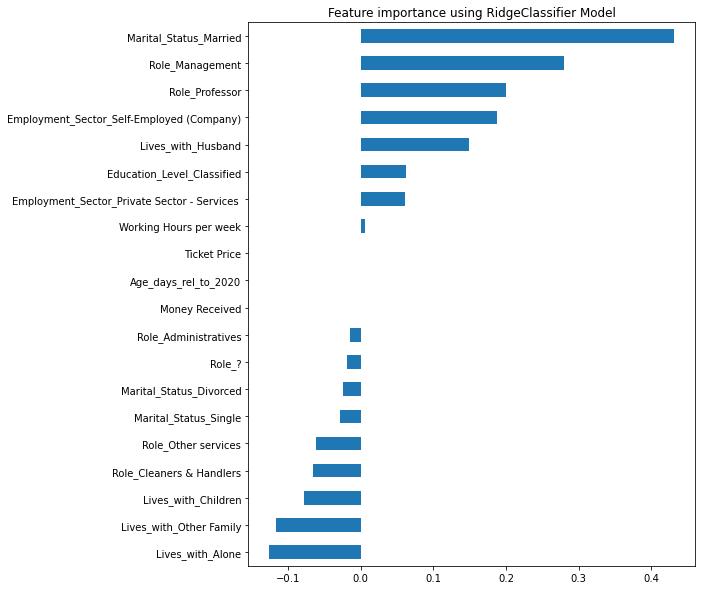

In [83]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
plot_importance(coef_ridge,'RidgeClassifier')

### XGBoost

[07:49:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.01252399 0.5057298  0.0087265  0.00682826 0.0813053  0.01480864
 0.00858253 0.00665783 0.02891529 0.04655415 0.0075648  0.01693577
 0.02680778 0.02722992 0.01259715 0.07631078 0.03282288 0.05666244
 0.01324417 0.009192  ]


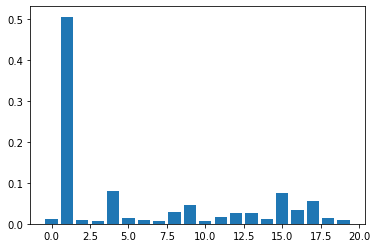

In [85]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data_selected_1, train_target)

# Check feature importance
print(model.feature_importances_)

# Inspect result with a plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

[07:49:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


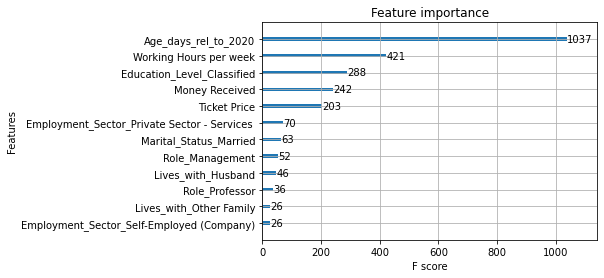

In [87]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data_selected_1, train_target)

# Inspect result with a plot
xgb_plot_imp(model, max_num_features = 12)
plt.show()

Based on our 3 methods of feature selection we will keep the ones we had but eliminate:

1. Role_Professor
2. Marital_Status_Divorced
3. Marital_Status_Single
4. Lives_with_Husband
5. Lives_with_Other_Family
6. Role_other_services
7. Employment_Sector_Self-Employed (Company)


In [88]:
# Create a new list with the features to keep now based on the matrices
features_to_keep_2 = ['Age_days_rel_to_2020',
                  'Marital_Status_Married',
                  'Lives_with_Children',
                  'Lives_with_Husband',
                  'Lives_with_Alone',
                  'Lives_with_Other Family',
                  'Role_Management',
                  'Role_Other services',
                  'Role_Professor',
                  'Working Hours per week',
                  'Money Received',
                  'Ticket Price',
                  'Education_Level_Classified',
                  'Employment_Sector_Self-Employed (Company)'
                ]

In [89]:
# Create a new dataset with the features we selected
train_data_selected_2 = train_data[features_to_keep_2]

## Feature selection based on MLP classifier

Strategy:
- 'features_certainly_to_keep' build the core feature set.
- To this core feature set, in each iteration, one new feature is added.
- The candidates are the features from 'features_to_keep_1' that have not been added yet.
- Greedy approach: Each iteration the feature that increases the model's performance the most, is added
- Stop when no feature would contribute positively to model's performance

In [92]:
# Define some handy functions

def listAdd(list_, string):
    set_ = set(list_)
    set_.add(string)
    return list(set_)

def listRemove(list_, string):
    set_ = set(list_)
    set_.remove(string)
    return list(set_)

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__
    
def update_features(feature, current_features, candidates):
    current_features = listAdd(current_features, feature)
    candidates = listRemove(candidates, feature)
    return current_features, candidates

In [112]:
def building_df(current_features, candidates):
    
    # Create a dataframe for results
    results_MLP = pd.DataFrame(columns=['Time','Train','Test', 'Iterations'])

    # Define the index
    index = []
    for feature in candidates:
        index = index + ['+' + ' ' + feature]
    
    for iteration, feature in enumerate(candidates):
        print('Iteration', iteration)
        features_to_use_this_iteration = current_features + [feature]
        print('Features used in this iteration:')
        print(features_to_use_this_iteration)
        print('')
        X = train_data[features_to_use_this_iteration]
        df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = [index[iteration]])
        df = show_results_intern(df, (model,True))
        results_MLP = results_MLP.append(df)
    return results_MLP

In [94]:
features_certainly_to_keep = ['Age_days_rel_to_2020',
                              'Working Hours per week',
                              'Money Received',
                              'Ticket Price',
                              'Education_Level_Classified']

In [95]:
# The features that are not in features_certainly_to_keep, but in features_to_keep_1
candidates_0 = list(set(features_to_keep_1) - set(features_certainly_to_keep))

In [96]:
# The current features
current_features_0 = features_certainly_to_keep

In [109]:
# Define our y
y = train_target

In [113]:
# Base case
X = train_data[current_features_0]
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['base (features_certainly_to_keep)'])
model = MLPClassifier()
results_MLP_base = show_results_intern(df, (model,True))
results_MLP_base

,Time,Train,Test,Iterations
base (features_certainly_to_keep),2.012+/-0.67,0.735+/-0.1,0.735+/-0.1,27.7+/-9.1


In [262]:
results_MLP_iteration_1 = building_df(current_features_0, candidates_0)
results_MLP_iteration_1

Iteration 0
Features used in this iteration:
['Age_days_rel_to_2020', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Education_Level_Classified', 'Role_Administratives']

Iteration 1
Features used in this iteration:
['Age_days_rel_to_2020', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Education_Level_Classified', 'Lives_with_Alone']

Iteration 2
Features used in this iteration:
['Age_days_rel_to_2020', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Education_Level_Classified', 'Marital_Status_Single']

Iteration 3
Features used in this iteration:
['Age_days_rel_to_2020', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Education_Level_Classified', 'Lives_with_Other Family']

Iteration 4
Features used in this iteration:
['Age_days_rel_to_2020', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Education_Level_Classified', 'Role_Cleaners & Handlers']

Iteration 5
Features used in this iteration:
['Age_days_rel_to_2020', '

,Time,Train,Test,Iterations
+ Role_Administratives,2.511+/-0.88,0.787+/-0.02,0.786+/-0.02,34.2+/-12.1
+ Lives_with_Alone,1.747+/-0.39,0.684+/-0.11,0.685+/-0.11,23.9+/-5.4
+ Marital_Status_Single,2.026+/-0.72,0.743+/-0.09,0.739+/-0.09,27.9+/-9.9
+ Lives_with_Other Family,2.149+/-0.5,0.676+/-0.1,0.672+/-0.1,29.3+/-7.1
+ Role_Cleaners & Handlers,1.93+/-0.79,0.759+/-0.08,0.756+/-0.08,26.4+/-10.9
+ Marital_Status_Married,2.3+/-0.91,0.73+/-0.11,0.732+/-0.11,30.8+/-11.3
+ Marital_Status_Divorced,1.817+/-0.36,0.695+/-0.12,0.692+/-0.12,24.2+/-5.1
+ Employment_Sector_Private Sector - Services,2.926+/-1.77,0.709+/-0.12,0.714+/-0.12,31.6+/-11.7
+ Role_?,2.121+/-0.97,0.705+/-0.11,0.707+/-0.12,27.2+/-12.3
+ Employment_Sector_Self-Employed (Company),2.34+/-0.41,0.779+/-0.05,0.777+/-0.05,28.4+/-7.5


**-> Add ...**

In [247]:
feature = 'Role_Other services'
current_features_1, candidates_1 = update_features(feature, current_features_0, candidates_0)

In [248]:
current_features_0

['Age_days_rel_to_2020',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Education_Level_Classified']

In [249]:
current_features_1

['Working Hours per week',
 'Education_Level_Classified',
 'Role_Other services',
 'Ticket Price',
 'Money Received',
 'Age_days_rel_to_2020']

In [250]:
candidates_0

['Role_Administratives',
 'Lives_with_Alone',
 'Marital_Status_Single',
 'Lives_with_Other Family',
 'Role_Cleaners & Handlers',
 'Marital_Status_Married',
 'Marital_Status_Divorced',
 'Employment_Sector_Private Sector - Services ',
 'Role_?',
 'Employment_Sector_Self-Employed (Company)',
 'Role_Professor',
 'Role_Management',
 'Lives_with_Husband',
 'Role_Other services',
 'Lives_with_Children']

In [251]:
candidates_1

['Role_Administratives',
 'Lives_with_Alone',
 'Marital_Status_Single',
 'Lives_with_Other Family',
 'Role_Cleaners & Handlers',
 'Marital_Status_Married',
 'Marital_Status_Divorced',
 'Employment_Sector_Private Sector - Services ',
 'Role_?',
 'Employment_Sector_Self-Employed (Company)',
 'Role_Professor',
 'Role_Management',
 'Lives_with_Husband',
 'Lives_with_Children']

### Iteration 2

In [218]:
results_MLP_iteration_2 = building_df(current_features_1, candidates_1)

Iteration 0
Features used in this iteration:
['Lives_with_Alone', 'Lives_with_Other Family', 'Education_Level_Classified', 'Role_Cleaners & Handlers', 'Role_?', 'Lives_with_Husband', 'Age_days_rel_to_2020', 'Marital_Status_Single', 'Marital_Status_Married', 'Ticket Price', 'Employment_Sector_Private Sector - Services ', 'Role_Professor', 'Role_Other services', 'Lives_with_Children', 'Marital_Status_Divorced', 'Employment_Sector_Self-Employed (Company)', 'Role_Management', 'Money Received', 'Role_Administratives', 'Working Hours per week', 'Role_Administratives']

Iteration 1
Features used in this iteration:
['Lives_with_Alone', 'Lives_with_Other Family', 'Education_Level_Classified', 'Role_Cleaners & Handlers', 'Role_?', 'Lives_with_Husband', 'Age_days_rel_to_2020', 'Marital_Status_Single', 'Marital_Status_Married', 'Ticket Price', 'Employment_Sector_Private Sector - Services ', 'Role_Professor', 'Role_Other services', 'Lives_with_Children', 'Marital_Status_Divorced', 'Employment_Secto

## Outlier detection

Features that could potentially have outliers:
'Age_days_rel_to_2020',
'Working Hours per week',
'Money Received' and
'Ticket Price'.

The other remaining features are encoded categorical features.

### 'Age_days_rel_to_2020'

In [81]:
# Show the age of the oldest and the youngest person in the data set
# The oldest person in the dataset is born somewhere around 1958 and the youngest person in the dataset is born 
# somewhere around 2031
print('Maximum and minimum of ages (roughly) in years:')
print(train_data_selected['Age_days_rel_to_2020'].max()/365)
print(train_data_selected['Age_days_rel_to_2020'].min()/365)

# Check that this makes sense by printing the birthdays of the oldest and of the youngest person in the data set (We 
# saved all birthdays in a previous step)
print()
print('Minimum and Maximum of birthdays:')
print(birthdays.min())
print(birthdays.max())

Maximum and minimum of ages (roughly) in years:
63.016438356164386
-10.808219178082192

Minimum and Maximum of birthdays:
1958-01-01
2031-10-11


**All values for 'Age_days_rel_to_2020' seem to be reasonable. No need to remove any outliers.**

### 'Working Hours per week'

In [82]:
print("Maximum and minimum of 'Working Hours per week':")
print(train_data_selected['Working Hours per week'].max())
print(train_data_selected['Working Hours per week'].min())

Maximum and minimum of 'Working Hours per week':
99
1


**One week has 24*7=168 hours. So, it is logially possible to work 99 hours.**

**Let's assume this person works every day. 99 hours divided by 7 is 14 hours. This would mean that 10 hours are left for sleeping and other activities. This could also be the case.**

**Let's assume this person works six days a week. 99 hours divided by 6 is 16.5 hours. This would mean that 7.5 hours are left for sleeping and other activities. For certain people (that either need little sleep or have no free time on work days), this could also be the case.**

**Conclusion: All values for 'Working Hours per week' seem to be reasonable. No need to remove any outliers.**

### 'Money Received'

In [83]:
print("Maximum and minimum of 'Money Received':")
print(train_data_selected['Money Received'].max())
print(train_data_selected['Money Received'].min())

Maximum and minimum of 'Money Received':
122999
0


**No negative values for 'Money Received'. No extremely high values either. No need to remove any outliers.**

### 'Ticket Price'

In [84]:
print("Maximum and minimum of 'Ticket Price':")
print(train_data_selected['Ticket Price'].max())
print(train_data_selected['Ticket Price'].min())

Maximum and minimum of 'Ticket Price':
5358
0


**No negative values for 'Ticket Price'. No extremely high values either. No need to remove any outliers.**

## Feature Scaling

In [85]:
train_data_selected

,Age_days_rel_to_2020,Marital_Status_Married,Lives_with_Children,Lives_with_Husband,Lives_with_Alone,Lives_with_Other Family,Role_Management,Role_Other services,Role_Professor,Working Hours per week,Money Received,Ticket Price,Education_Level_Classified,Employment_Sector_Self-Employed (Company)
0,6384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0,2273,11,0.0
1,5445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0,0,8,0.0
2,4244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,0,2321,8,0.0
3,13056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,5395,0,7,0.0
4,2034,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,45,0,0,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,-813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0,0,8,0.0
22396,-1536,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35,0,0,8,0.0
22397,-575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40,2674,0,14,0.0
22398,3482,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,90,0,0,13,0.0


In [86]:
train_target

0        1
1        1
2        1
3        1
4        1
        ..
22395    0
22396    0
22397    0
22398    1
22399    0
Name: Income, Length: 22400, dtype: int64

In [87]:
# Use 'StandardScaler' to scale our data
stdscaler = StandardScaler()
train_data_selected_scaled = pd.DataFrame(stdscaler.fit_transform(train_data_selected), columns=train_data_selected.columns)

In [88]:
# Check the result of the scaling
print('Minima:')
print(train_data_selected_scaled.min())
print()
print('Maxima:')
print(train_data_selected_scaled.max())

Minima:
Age_days_rel_to_2020                        -1.608879
Marital_Status_Married                      -0.915931
Lives_with_Children                         -0.431715
Lives_with_Husband                          -0.221656
Lives_with_Alone                            -0.343331
Lives_with_Other Family                     -0.589517
Role_Management                             -0.377733
Role_Other services                         -0.337206
Role_Professor                              -0.381735
Working Hours per week                      -3.191733
Money Received                              -0.143582
Ticket Price                                -0.218204
Education_Level_Classified                  -3.216963
Employment_Sector_Self-Employed (Company)   -0.187786
dtype: float64

Maxima:
Age_days_rel_to_2020                          3.793377
Marital_Status_Married                        1.091785
Lives_with_Children                           2.316343
Lives_with_Husband                            4

## Model selection

We will try different models, and for each model we will also apply different parameters. In the end we will check which model gives us better insights within each models best parameter choice collection.

In [89]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'

X = train_data_selected_scaled
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 150, shuffle = True, stratify = y)

In [110]:
# Create avg_score_intern to check for each model
def avg_score_intern(model_iterations_boolean_pair):
    
    oversampling = False
    n_splits = 10
    print_info = False
    
    model = model_iterations_boolean_pair[0]
    if print_info:
        print(model)
    
    # apply kfold
    # kf = KFold(n_splits=n_splits)
    kf = RepeatedKFold(n_splits = n_splits, n_repeats = 10, random_state = 42)
    
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    
    split_counter = 0
    
    for train_index, test_index in kf.split(X):
        
        # get the indices of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Print the KFold step
        split_counter = split_counter + 1
        if print_info:
            print('KFold step', split_counter)
        
        if oversampling:
            
            if split_counter==1:
                # Check class distribution before random oversampling
                print('Before random sampling:')
                class_dist(y_train)

            # Perform random oversampling using strategy 'minority', meaning that rows of the the minority target class 
            # will be randomly duplicated (with repetition) until the distribution of the two classes is equal
            X_train, y_train = rand_oversampling(X_train, y_train, 'minority')
            
            if split_counter==1:
                # Check result
                print('After random sampling:')
                class_dist(y_train)
                print('')
        
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        
        if model_iterations_boolean_pair[1]:
            n_iter.append(model.n_iter_)
    
    if print_info:
        print('----------------------------------------')
            
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

In [111]:
# Create show_results_intern for each model 
def show_results_intern(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test, avg_iter = avg_score_intern(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test, avg_iter
        count+=1
    return df

### MULTILAYER  PERCEPTRON (MLP)
#### Without random oversampling

In [92]:
# Create an MLPClassifier
model = MLPClassifier()
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Raw'])
show_results_intern(df, (model,True))

MLPClassifier()
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------


,Time,Train,Test,Iterations
Raw,17.945+/-1.39,0.861+/-0.0,0.85+/-0.01,198.6+/-2.8


#### With random oversampling

In [109]:
# Create an MLPClassifier
model = MLPClassifier()
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Raw'])
show_results_intern(df, (model,True))

MLPClassifier()
KFold step 1
Before random sampling:
Number of rows: 14933
Percentage 0: 76.5486 %
Percentage 1: 23.4514 %
After random sampling:
Number of rows: 22862
Percentage 0: 50.0 %
Percentage 1: 50.0 %

KFold step 2
KFold step 3
----------------------------------------


,Time,Train,Test,Iterations
Raw,19.185+/-0.29,0.843+/-0.0,0.801+/-0.0,200.0+/-0.0


#### HIDDEN LAYER SIZE

Based on some rules of thumb:
- The number of hidden neurons should be between the size of the input layer and the size of the output layer
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
- The number of hidden neurons should be less than twice the size of the input layer

We have 9 input features.

We will try the following combinations:

1. hidden_layers_size = (9)
2. hidden_layers_size = (6)
3. hidden_layers_size = (3, 3)


In [113]:
# Create the corresponding models as described above
model_1 = MLPClassifier(hidden_layer_sizes=(9),
                       random_state = 42)

model_2 = MLPClassifier(hidden_layer_sizes=(6),
                       random_state = 42)

model_3 = MLPClassifier(hidden_layer_sizes=(3, 3),
                       random_state = 42)

In [114]:
# Check the result in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['1','2','3'])
show_results_intern(df, (model_1,True), (model_2,True), (model_3,True))

MLPClassifier(hidden_layer_sizes=9, random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------
MLPClassifier(hidden_layer_sizes=(3, 3), random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------


,Time,Train,Test,Iterations
1,4.565+/-0.46,0.853+/-0.0,0.851+/-0.01,98.6+/-9.8
2,3.406+/-0.48,0.85+/-0.0,0.848+/-0.01,75.8+/-10.9
3,6.371+/-0.68,0.849+/-0.0,0.849+/-0.01,107.6+/-10.9


Our best option seems to be with 2 hidden layers and 7 neurons for now.

#### ACTIVATION FUNCTION

We will try our model with several activation functions for the best hidden layer choice we got before.

The functions we will use are:
- tanh
- logistic
- reLU (is the default one)

In [175]:
# # Create the corresponding models as described above
model_tanh = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'tanh',
                          random_state = 42)

model_relu = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu',
                          random_state = 42)

model_logistic = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'logistic',
                          random_state = 42)

In [176]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['tanh','relu','logistic'])
show_results_intern(df, (model_tanh,True), (model_relu,True), (model_logistic,True))

MLPClassifier(activation='tanh', hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
tanh,4.741+/-0.11,0.854+/-0.0,0.852+/-0.0,200.0+/-0.0
relu,2.585+/-0.1,0.85+/-0.0,0.847+/-0.0,103.5+/-5.5
logistic,4.062+/-0.22,0.851+/-0.0,0.848+/-0.0,169.5+/-10.5


We sould for now keep the tanh activation function since it's the one that gives us a good balance between accuracy and time.

#### SOLVER

We will try 3 solvers:

- L-BFGS
- ADAM
- SGD 


In [177]:
# Create the corresponding models as described above
model_lbfgs = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'lbfgs',
                          random_state = 42)

model_adam = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          random_state = 42)

model_sgd = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'sgd',
                          random_state = 42)

In [178]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['lbfgs','adam','sgd'])
show_results_intern(df, (model_lbfgs,True), (model_adam,True), (model_sgd,True))

MLPClassifier(hidden_layer_sizes=6, random_state=42, solver='lbfgs')
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, random_state=42, solver='sgd')
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
lbfgs,0.539+/-0.01,0.852+/-0.0,0.85+/-0.0,200.0+/-0.0
adam,2.57+/-0.14,0.85+/-0.0,0.847+/-0.0,103.5+/-5.5
sgd,3.532+/-0.05,0.845+/-0.0,0.844+/-0.0,156.5+/-2.5


As expected, the time that lbfgs took was much smaller than the other ones (by around 8.5 times in average). Not only the time was slower but also it got a better accuracy both in training and in testing. That being said we will opt for using lbfgs solver.

#### LEARNING RATE

We will try 3 different values for the learning rate init:
- 0.001
- 0.01
- 0.1

In [179]:
# Create the corresponding models as described above
model_lr001 = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.001, 
                          random_state = 42)

model_lr01 = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.01, 
                          random_state = 42)

model_lr1 = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.1, 
                          random_state = 42)

In [180]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = 0.001','LR = 0.01','LR = 0.1'])
show_results_intern(df, (model_lr001,True), (model_lr01,True), (model_lr1,True))

MLPClassifier(hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.01, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.1, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
LR = 0.001,2.593+/-0.1,0.85+/-0.0,0.847+/-0.0,103.5+/-5.5
LR = 0.01,1.647+/-0.38,0.853+/-0.0,0.85+/-0.0,65.0+/-15.0
LR = 0.1,0.713+/-0.07,0.85+/-0.0,0.848+/-0.0,26.5+/-2.5


#### LEARNING RATE TYPE

We will try both types:
- adaptive
- constant

In [181]:
# Create the corresponding models as described above
model_lrconstant = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.001,
                          learning_rate = 'constant',
                          random_state = 42)

model_lradaptive = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.001,
                          learning_rate = 'adaptive',
                          random_state = 42)

In [182]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['constant','adaptive'])
show_results_intern(df, (model_lrconstant,True), (model_lradaptive,True))

MLPClassifier(hidden_layer_sizes=6, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
MLPClassifier(hidden_layer_sizes=6, learning_rate='adaptive', random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
constant,2.562+/-0.15,0.85+/-0.0,0.847+/-0.0,103.5+/-5.5
adaptive,2.574+/-0.12,0.85+/-0.0,0.847+/-0.0,103.5+/-5.5


#### MAXIMUM ITERATIONS

As we see in the results above our models reached the default value of maximum iterations (200). That specific value works properly for small datasets, although this is not the case.

We will try our model with the following values:
- 300
- 600
- 1000

After the results, we check if our model reached convergence. If needed we will provide new values for this parameter.

In [111]:
# Create the corresponding models as described above
#model_300_iter = model_adam = MLPClassifier(hidden_layer_sizes=(6),
#                          activation = 'relu', 
#                          solver = 'adam',
#                          learning_rate_init = 0.001, 
#                          random_state = 42)
#
#model_600_iter = MLPClassifier(hidden_layer_sizes=(4, 3),
#                          activation = 'tanh',
#                          solver = 'lbfgs',
#                           max_iter = 600)
#
#model_900_iter = MLPClassifier(hidden_layer_sizes=(4, 3),
#                          activation = 'tanh',
#                          solver = 'lbfgs',
#                           max_iter = 900)

In [112]:
# Check the results in a dataframe
#df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['300 iter','600 iter','900 iter'])
#show_results_intern(df, model_300_iter, model_600_iter, model_900_iter)

#### --------------------------------------------------------

### GridSearch for MLP

We will now run a GridSearchCV to find which is a possible set of parameters

In [115]:
parameter_space_mlp = {
    'hidden_layer_sizes': [(100,), (6, 6), (6,), (50, 50)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
    'alpha': [0.0001, 0.05]
}

parameter_space_mlp

{'hidden_layer_sizes': [(100,), (6, 6), (6,), (50, 50)],
 'activation': ['tanh', 'relu', 'logistic'],
 'solver': ['sgd', 'adam', 'lbfgs'],
 'learning_rate_init': [0.001, 0.01, 0.1],
 'learning_rate': ['constant', 'adaptive'],
 'alpha': [0.0001, 0.05]}

In [124]:
if False:
    # Initialize the model
    model = MLPClassifier(max_iter = 300)

    # Create a GridSearch instance
    gs_mlp = GridSearchCV(model, 
                          parameter_space_mlp, 
                          n_jobs = -1,
                          cv = 5,
                          verbose = 4)

    # Fit it to our model
    gs_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 373.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 842.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 852.3min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100,), (6, 6), (6,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=4)

In [125]:
if False:
    # Find the best parameters
    gs_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (6, 6),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'solver': 'lbfgs'}

In [126]:
if False:
    # Best parameter set
    print('------------------------------------------------------------------------------------------------------------------------')
    print('Best parameters found:\n', gs_mlp.best_params_)
    print('------------------------------------------------------------------------------------------------------------------------')

    # All results
    means = gs_mlp.cv_results_['mean_test_score']
    stds = gs_mlp.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs_mlp.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
------------------------------------------------------------------------------------------------------------------------
0.830 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.842 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.846 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
0.840 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100

#### --------------------------------------------------------

After using the gridsearch to find the possible best parameters, let us test that option against the one we found to be the best manually.

In [95]:
# Copy both models with their respective parameters

best_mlp_manual = MLPClassifier(hidden_layer_sizes=(6),
                          activation = 'relu', 
                          solver = 'adam',
                          learning_rate_init = 0.001,
                          learning_rate = 'adaptive',
                          random_state = 42)

best_mlp_grid = MLPClassifier(hidden_layer_sizes=(6, 6),
                          activation = 'tanh', 
                          solver = 'lbfgs',
                          learning_rate_init = 0.01,
                          learning_rate = 'adaptive',
                          alpha = 0.0001,
                          max_iter = 5e3,
                          random_state = 42)

In [96]:
# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Manually','GridSearch'])
show_results_intern(df, (best_mlp_manual,True), (best_mlp_grid,True))

MLPClassifier(hidden_layer_sizes=6, learning_rate='adaptive', random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------
MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 6),
              learning_rate='adaptive', learning_rate_init=0.01,
              max_iter=5000.0, random_state=42, solver='lbfgs')
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------


,Time,Train,Test,Iterations
Manually,3.635+/-0.41,0.85+/-0.0,0.848+/-0.01,75.8+/-10.9
GridSearch,34.869+/-12.46,0.861+/-0.0,0.855+/-0.01,3684.7+/-1248.6


From what we see, the results using the GridSearch seemed to extract better result and reached convergence. We will use those as the optimal parameters for now.

### GRADIENT BOOSTING CLASSIFIER

#### LEARNING RATE

In [97]:
# Set different learning rates to the models and check the results

model_lr1 = GradientBoostingClassifier(learning_rate = .1, 
                                      random_state = 42)

model_lr2 = GradientBoostingClassifier(learning_rate = .2, 
                                      random_state = 42)

model_lr3 = GradientBoostingClassifier(learning_rate = .3, 
                                      random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = .1','LR = .2', 'LR = .3'])
show_results_intern(df, (model_lr1,False), (model_lr2,False), (model_lr3,False))

GradientBoostingClassifier(random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------
GradientBoostingClassifier(learning_rate=0.2, random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, random_state=42)
KFold step 1
KFold step 2
KFold step 3
KFold step 4
KFold step 5
KFold step 6
KFold step 7
KFold step 8
KFold step 9
KFold step 10
----------------------------------------


,Time,Train,Test,Iterations
LR = .1,1.68+/-0.1,0.867+/-0.0,0.863+/-0.01,nan+/-nan
LR = .2,1.647+/-0.05,0.873+/-0.0,0.864+/-0.01,nan+/-nan
LR = .3,1.625+/-0.02,0.877+/-0.0,0.865+/-0.01,nan+/-nan


#### NUMBER OF ESTIMATORS

In [161]:
# Set different numbers of estimators to the models and check the results

model_nesti_50 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 50,
                                        random_state = 42)

model_nesti_75 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 75,
                                        random_state = 42)

model_nesti_100 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        random_state = 42)

model_nesti_200 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 200,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['50 esti' ,'75 esti', '100 esti','200 esti'])
show_results_intern(df, (model_nesti_50,False), (model_nesti_75,False), (model_nesti_100,False),  (model_nesti_200,False))

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, n_estimators=75, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, n_estimators=200, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
50 esti,0.439+/-0.01,0.873+/-0.0,0.864+/-0.0,nan+/-nan
75 esti,0.68+/-0.0,0.879+/-0.01,0.866+/-0.0,nan+/-nan
100 esti,0.863+/-0.01,0.883+/-0.01,0.865+/-0.01,nan+/-nan
200 esti,1.75+/-0.02,0.901+/-0.0,0.861+/-0.0,nan+/-nan


#### MINIMUM SAMPLES SPLIT

In [162]:
# Set different minimum number of samples to split to the models and check the results

model_minsample4 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 4,
                                        random_state = 42)

model_minsample7 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 7,
                                        random_state = 42)

model_minsample10 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Sample = 4', 'Min Sample = 7', 'Min Sample = 10'])
show_results_intern(df, (model_minsample4,False), (model_minsample7,False), (model_minsample10,False))

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=4,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_split=7,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_split=10,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
Min Sample = 4,0.864+/-0.01,0.883+/-0.01,0.864+/-0.0,nan+/-nan
Min Sample = 7,0.862+/-0.0,0.883+/-0.01,0.865+/-0.01,nan+/-nan
Min Sample = 10,0.874+/-0.01,0.882+/-0.01,0.865+/-0.01,nan+/-nan


#### MINIMUM SAMPLES LEAF

In [163]:
# Set different minimum number of leaves to split to the models and check the results

model_minleaf5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        random_state = 42)

model_minleaf6 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 6,
                                        random_state = 42)

model_minleaf7 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 7,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Leaf = 5', 'Min Leaf = 6', 'Min Leaf = 7'])
show_results_intern(df, (model_minleaf5,False), (model_minleaf6,False), (model_minleaf7,False))

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=6,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=7,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
Min Leaf = 5,0.869+/-0.0,0.879+/-0.0,0.865+/-0.0,nan+/-nan
Min Leaf = 6,0.867+/-0.01,0.88+/-0.0,0.865+/-0.01,nan+/-nan
Min Leaf = 7,0.86+/-0.0,0.879+/-0.01,0.865+/-0.0,nan+/-nan


#### MAXIMUM DEPTH

In [164]:
# Set different maximum depths to the models and check the results

model_maxd3 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)

model_maxd4 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 4,
                                        random_state = 42)

model_maxd5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 5,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Max Depth = 3', 'Max Depth = 4', 'Max Depth = 5'])
show_results_intern(df, (model_maxd3,False), (model_maxd4,False) , (model_maxd5,False))

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, max_depth=5, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
Max Depth = 3,0.871+/-0.01,0.879+/-0.0,0.865+/-0.0,nan+/-nan
Max Depth = 4,1.109+/-0.0,0.894+/-0.0,0.863+/-0.0,nan+/-nan
Max Depth = 5,1.345+/-0.0,0.914+/-0.0,0.859+/-0.01,nan+/-nan


#### SUBSAMPLE

In [165]:
# Set different subsamples to the models and check the results

model_subsample1 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        random_state = 42)

model_subsample8 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 0.8,
                                        random_state = 42)

model_subsample6 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 0.6,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['sample = 1', 'sample = 0.8', 'sample = 0.6'])
show_results_intern(df, (model_subsample1,False), (model_subsample8,False) , (model_subsample6,False))

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42,
                           subsample=0.8)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42,
                           subsample=0.6)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
sample = 1,0.873+/-0.0,0.879+/-0.0,0.865+/-0.0,nan+/-nan
sample = 0.8,0.814+/-0.0,0.883+/-0.01,0.863+/-0.01,nan+/-nan
sample = 0.6,0.715+/-0.0,0.88+/-0.0,0.863+/-0.01,nan+/-nan


#### MAXIMUM NUMBER OF FEATURES

In [166]:
# Set different subsamples to the models and check the results

model_maxfeat5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = 5,
                                        random_state = 42)

model_maxfeat9 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = 9,
                                        random_state = 42)

model_nomaxfeat = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['max feat = 5', 'max feat = 9', 'max feat = None'])
show_results_intern(df, (model_maxfeat5,False), (model_maxfeat9,False) , (model_nomaxfeat,False))

GradientBoostingClassifier(learning_rate=0.3, max_features=5,
                           min_samples_leaf=5, min_samples_split=10,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, max_features=9,
                           min_samples_leaf=5, min_samples_split=10,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
max feat = 5,0.45+/-0.01,0.876+/-0.01,0.864+/-0.0,nan+/-nan
max feat = 9,0.643+/-0.01,0.878+/-0.0,0.864+/-0.0,nan+/-nan
max feat = None,0.862+/-0.0,0.879+/-0.0,0.865+/-0.0,nan+/-nan


Find the best parameters with a GridSearch

In [217]:
# Initialise the model to be used
model_gbc = GradientBoostingClassifier()

# Create the parameter space
parameter_space_gbc = {'n_estimators' : [50, 100, 150, 300, 400],
                       'learning_rate' : [0.1, 0.3],
                       'max_features' : [None, 7],
                       'max_depth' : [2, 3, 5],
                       'min_samples_leaf' : [1, 3, 5],
                       'min_samples_split' : [4, 8, 10],
                       'random_state' : [42]}

# Check the parameters
parameter_space_gbc

{'n_estimators': [50, 100, 150, 300, 400],
 'learning_rate': [0.1, 0.3],
 'max_features': [None, 7],
 'max_depth': [2, 3, 5],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [4, 8, 10],
 'random_state': [42]}

In [219]:
# Create the GridSearch instance with our parameters
grid_gbc = GridSearchCV(model_gbc, 
                        parameter_space_gbc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_gbc.fit(X_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 21.1min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [2, 3, 5],
                         'max_features': [None, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [50, 100, 150, 300, 400],
                         'random_state': [42]},
             verbose=5)

In [220]:
# Find the best parameter set
grid_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300,
 'random_state': 42}

In [167]:
# Check the scores of Grid vs Manual
gbc_manual = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

gbc_grid = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 300,
                                        min_samples_split = 8,
                                        min_samples_leaf = 3,
                                        max_depth = 3,
                                        max_features = None,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Manual', 'Grid'])
show_results_intern(df, (gbc_manual,False), (gbc_grid,False))

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           min_samples_split=10, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=8,
                           n_estimators=300, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
Manual,0.868+/-0.01,0.879+/-0.0,0.865+/-0.0,nan+/-nan
Grid,2.566+/-0.01,0.881+/-0.01,0.865+/-0.0,nan+/-nan


### ADABOOST CLASSIFIER

In [352]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [50, 100, 150, 300, 400],
                       'learning_rate' : [0.3, 0.6, 0.9, 1],
                       'algorithm' : ['SAMME.R', 'SAMME'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [50, 100, 150, 300, 400],
 'learning_rate': [0.3, 0.6, 0.9, 1],
 'algorithm': ['SAMME.R', 'SAMME'],
 'random_state': [42]}

In [354]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.3, 0.6, 0.9, 1],
                         'n_estimators': [50, 100, 150, 300, 400],
                         'random_state': [42]},
             verbose=5)

In [355]:
# Find the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 400,
 'random_state': 42}

In [168]:
# Test the model with those parameters
model_abc = AdaBoostClassifier(n_estimators = 400, 
                               learning_rate = 1,
                              random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['AdaBoost'])
show_results_intern(df, (model_abc,False))

AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
AdaBoost,2.417+/-0.0,0.867+/-0.0,0.863+/-0.0,nan+/-nan


### RANDOM FOREST

We will try to find the best parameters by directly running a GridSearchCV in this case

In [357]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 10, 14]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameter_space_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameter_space_rf

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'min_samples_split': [10, 20, 30],
 'min_samples_leaf': [6, 10, 14],
 'bootstrap': [True, False]}

In [360]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rs_rf = RandomizedSearchCV(estimator = model_rf, 
                           param_distributions = parameter_space_rf, 
                           n_iter = 100, cv = 3, verbose=2, 
                           random_state=42, 
                           n_jobs = -1)

# Fit the random search model
rs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 10, 14],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [361]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

In [169]:
# Try a random forest classifier with those parameters
model_rf = RandomForestClassifier(n_estimators = 50, 
                                  min_samples_split = 10, 
                                  min_samples_leaf = 6,
                                  max_features = 'auto', 
                                  max_depth = 25, 
                                  bootstrap = True, 
                                  random_state = 42
                                 )

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['random forest'])
show_results_intern(df, (model_rf,False))

RandomForestClassifier(max_depth=25, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=50, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
random forest,0.314+/-0.01,0.872+/-0.0,0.858+/-0.0,nan+/-nan


### SVC

Finding the best parameters for SVC using a grid search

In [363]:
# Definig the classifier to use
model_svc = SVC()

# Creating the parameter space
parameter_space_svc = {'C':[1, 5, 10], 
                       'gamma':['auto', 'scale', 0.1, 5], 
                       'kernel':['rbf', 'linear', 'sigmoid']
                      }

# Checking the parameter space
parameter_space_svc

{'C': [1, 5, 10],
 'gamma': ['auto', 'scale', 0.1, 5],
 'kernel': ['rbf', 'linear', 'sigmoid']}

In [365]:
# Create the GridSearch instance with our parameters
grid_svc = GridSearchCV(model_svc, 
                        parameter_space_svc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_svc.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed: 230.7min


KeyboardInterrupt: 

In [ ]:
# Get the best parameters
grid_svc.best_params_

In [149]:
# Initialize the model
model_svc = SVC(C = 5,
           gamma = 'scale',
           kernel = 'rbf',
           random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['svc'])
show_results_intern(df, (model_svc,False))

SVC(C=5, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
svc,3.055+/-0.16,0.858+/-0.0,0.847+/-0.0,nan+/-nan


### Use stratified k-fold cross validation to find a good model
**For this, define a function that applies stratified k-fold cross validation on a given model and data set and computes the average accuracy.**

**Then, initialise different models and use the function on them.**

In [159]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'
def avg_score(model, data, target, model_name):
    """Function to apply a model and compute the average accuracy by using k-fold cross validation"""
    
    # Create an instance of 'StratifiedKFold' with 10 splits
    kf_stratified = StratifiedKFold(n_splits=10)

    # Create lists to store the results from the different splits 
    score_train = []
    score_validation = []
    
    timer = []
    #n_iter = []
    
    for train_index, validation_index in kf_stratified.split(data, target):
        
        # get the indexes of the observations assigned for each partition
        X_train, X_validation = data.iloc[train_index], data.iloc[validation_index]
        y_train, y_validation = target.iloc[train_index], target.iloc[validation_index]
        
        # Start counting time
        begin = time.perf_counter()
        
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Finish counting time
        end = time.perf_counter()
        
        # Get the mean accuracy for the training set
        value_train = model.score(X_train, y_train)
        
        # Get the mean accuracy for the validation set
        value_validation = model.score(X_validation, y_validation)
        
        # Append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_validation.append(value_validation)
        
        timer.append(end-begin)
        
        # n_iter.append(model.n_iter_)
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),2)
    avg_train = round(np.mean(score_train),4)
    avg_validation = round(np.mean(score_validation),4)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),6)
    std_validation = round(np.std(score_validation),6)
    # avg_iter = round(np.mean(n_iter),1)
    # std_iter = round(np.std(n_iter),1)
    
    return pd.DataFrame({'Avg. train score':[avg_train], 'Std. dev. train score':[std_train],
                         'Avg. validation score':[avg_validation], 'Std. dev. validation score':[std_validation],
                        'Avg. time':[avg_time], 'Std. dev. time':[std_time]},
                        index=[model_name]), score_train, score_validation, timer

# Create a dataframe for results
models_results = pd.DataFrame(columns=['Avg. train score','Std. dev. train score','Avg. validation score','Std. dev. validation score',
                      'Avg. time','Std. dev. time'])

### MLP classifier

In [160]:
# Initialise an MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(6, 6),
                          activation = 'tanh', 
                          solver = 'lbfgs',
                          learning_rate_init = 0.01,
                          learning_rate = 'adaptive',
                          alpha = 0.0001,
                          max_iter = 5e3,
                          random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
MLP_result, MLP_score_train, MLP_score_validation, MLP_timer = avg_score(model, train_data_selected_scaled, train_target, 'Multilayer perceptron')

In [161]:
# Append result to 'models_results'
models_results = models_results.append(MLP_result)

### Gradient Boosting Classifier

In [162]:
# Initialise a Gradient Boosting classifier
model = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 300,
                                        subsample = 1,
                                        min_samples_split = 20,
                                        min_samples_leaf = 2,
                                        max_depth = 3,
                                        max_features = None,
                                        random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
GBC_result, GBC_score_train, GBC_score_validation, GBC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Gradient Boosting Classifier')

In [163]:
# Append result to 'models_results'
models_results = models_results.append(GBC_result)

### Ada Boost classifier

In [164]:
# Initialise an Ada Boost classifier
model = AdaBoostClassifier(n_estimators = 150, 
                          random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
ABC_result, ABC_score_train, ABC_score_validation, ABC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Ada Boost Classifier')

In [165]:
# Append result to 'models_results'
models_results = models_results.append(ABC_result)

### Random Forest classifier

In [166]:
# Initialise a Random Forest classifier
model = RandomForestClassifier(n_estimators = 150, 
                                  min_samples_split = 10, 
                                  min_samples_leaf = 6,
                                  max_features = 'sqrt', 
                                  max_depth = 45, 
                                  bootstrap = True, 
                                  random_state = 42
                                 )

# Use 'avg_score' to apply k-fold cross validation
RFC_result, RFC_score_train, RFC_score_validation, RFC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Random Forest Classifier')

In [167]:
# Append result to 'models_results'
models_results = models_results.append(RFC_result)

### Extra Trees classifier

In [168]:
# Initialise an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators = 150,
                            n_jobs = -1,
                            random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
ETC_result, ETC_score_train, ETC_score_validation, ETC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Extra Trees Classifier')

In [169]:
# Append result to 'models_results'
models_results = models_results.append(ETC_result)

### Support Vector Classification

In [170]:
# Initialise an SVC
model = SVC(C = 100,
           gamma = 'scale',
           kernel = 'rbf',
           random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
SVC_result, SVC_score_train, SVC_score_validation, SVC_timer = avg_score(model, train_data_selected_scaled, train_target, 'SVC')

In [171]:
# Append result to 'models_results'
models_results = models_results.append(SVC_result)

### K Neighbors

In [172]:
# Initialise a KNeighbors Classifier 
model = KNeighborsClassifier(n_neighbors = 7, 
                             n_jobs = -1)

# Use 'avg_score' to apply k-fold cross validation
KNN_result, KNN_score_train, KNN_score_validation, KNN_timer = avg_score(model, train_data_selected_scaled, train_target, 'K Neighbors')

In [173]:
# Append result to 'models_results'
models_results = models_results.append(KNN_result)

### Gaussian Process Classifier

In [174]:
if False:
    # Initialise a Gaussian Process Classifier
    model = GaussianProcessClassifier(n_jobs = -1,
                                     random_state = 42)

    # Use 'avg_score' to apply k-fold cross validation
    GPC_result, GPC_score_train, GPC_score_validation, GPC_timer = avg_score(model, train_data_selected_scaled, train_target, 'Gaussian Process')

In [175]:
if False:    
    # Append result to 'models_results'
    models_results = models_results.append(GPC_result)

### Gaussian Naive Bayes

In [176]:
# Initialise a Gaussian Naive Bayes
model = GaussianNB()

# Use 'avg_score' to apply k-fold cross validation
GNB_result, GNB_score_train, GNB_score_validation, GNB_timer = avg_score(model, train_data_selected_scaled, train_target, 'Gaussian NB')

In [177]:
# Append result to 'models_results'
models_results = models_results.append(GNB_result)

### ---------------------------------------------------------------------------------------------------------------

In [178]:
# Check the DF with the different models results
models_results

,Avg. train score,Std. dev. train score,Avg. validation score,Std. dev. validation score,Avg. time,Std. dev. time
Multilayer perceptron,0.8617,0.002279,0.8561,0.007168,40.06,9.93
Gradient Boosting Classifier,0.8751,0.001224,0.8663,0.007577,4.38,0.04
Ada Boost Classifier,0.8632,0.000882,0.8612,0.007542,1.53,0.04
Random Forest Classifier,0.8752,0.000910,0.8599,0.006663,1.64,0.01
Extra Trees Classifier,0.9990,0.000070,0.8233,0.004800,1.03,0.04
SVC,0.8657,0.001367,0.8482,0.007017,37.13,2.66
K Neighbors,0.8737,0.000966,0.8403,0.007457,0.55,0.01
Gaussian NB,0.8191,0.000745,0.8192,0.006865,0.01,0.00


## STACKING MODELS

In [476]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()

# Random Forest Classifier
rf_model = AdaBoostClassifier(n_estimators = 300, 
                               learning_rate = 1,
                              random_state = 42)

# Fit the models to our data
gbc = gbc_model.fit(X_train, y_train)
rf = rf_model.fit(X_train, y_train)


# Get the models scores
gbc_score = gbc.score(X_test, y_test)
rf_score = rf.score(X_test, y_test)
print('Accuracy of the GBC model: '+ str(gbc.score(X_test, y_test)))
print('Accuracy of the RF model: '+ str(rf.score(X_test, y_test)))

Accuracy of the GBC model: 0.862202380952381
Accuracy of the RF model: 0.8635416666666667


In [477]:
from sklearn.ensemble import StackingClassifier

# Define the model to be stacked
estimators = [('GBC', gbc_model),('RF', rf_model)]

# Create a stacking instance using the models defined above
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit it to our data
sc.fit(X_train, y_train)

# Get the score
sc_score = sc.score(X_test, y_test)

In [478]:
sc_score

0.862202380952381

## Further work on our so far best model

In [479]:
# Assess feature importance with our gbc model
gbc_model.feature_importances_

array([0.37781356, 0.21242975, 0.18618992, 0.07103247, 0.06844853,
       0.0379379 , 0.0208184 , 0.01418566, 0.00632841, 0.00481539])

<AxesSubplot:xlabel='importances', ylabel='features'>

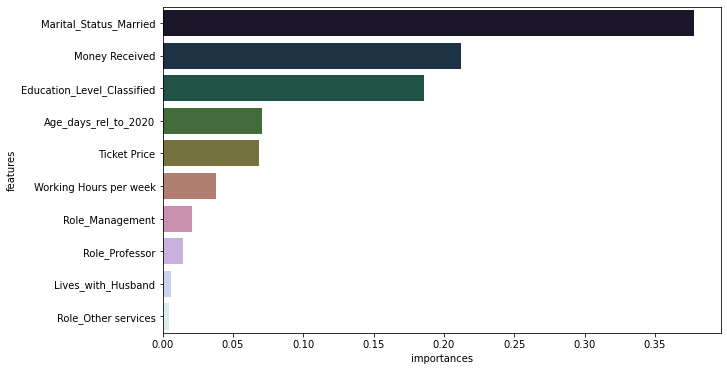

In [480]:
# Plot them
fig = plt.figure(figsize = (10,6))
importances = gbc.feature_importances_
features = X_train.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)
sns.barplot(data['importances'], data['features'], palette = 'cubehelix', orient = 'h')

In [112]:
# Try the model with the five most important features
features_to_keep_gbc = ['Marital_Status_Married',
                       'Money Received',
                       'Education_Level_Classified',
                       'Age_days_rel_to_2020',
                       'Ticket Price',
                       'Working Hours per week',
                       'Role_Management',
                       'Role_Professor',
                       'Lives_with_Husband',
                       'Role_Other services']

In [113]:
# Split the new data
X = train_data_selected_scaled
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 150, shuffle = True, stratify = y)

In [151]:
# Initialize the model
GBC = GradientBoostingClassifier()

In [152]:
# Check its score
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['GBC'])
show_results_intern(df, (GBC,False))

GradientBoostingClassifier()
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
GBC,0.867+/-0.01,0.869+/-0.0,0.863+/-0.0,nan+/-nan


From this point on, we will try to tune the parameters in order to optimize the model

In [153]:
# Set different learning rates to the models and check the results

GBC_LR2 = GradientBoostingClassifier(learning_rate = .2, 
                                      random_state = 42)

GBC_LR3 = GradientBoostingClassifier(learning_rate = .3, 
                                      random_state = 42)

GBC_LR5 = GradientBoostingClassifier(learning_rate = .5, 
                                      random_state = 42)

# Inspect results
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = .2', 'LR = .3', 'LR = .5'])
show_results_intern(df, (GBC_LR2,False), (GBC_LR3,False), (GBC_LR5,False))

GradientBoostingClassifier(learning_rate=0.2, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.5, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
LR = .2,0.864+/-0.0,0.876+/-0.01,0.865+/-0.0,nan+/-nan
LR = .3,0.866+/-0.0,0.883+/-0.01,0.865+/-0.01,nan+/-nan
LR = .5,0.862+/-0.01,0.893+/-0.0,0.863+/-0.01,nan+/-nan


In [154]:
# Set different numbers of estimators to the models and check the results

GBC_NE50 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 50,
                                        random_state = 42)

GBC_NE100 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        random_state = 42)

GBC_NE150 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 150,
                                        random_state = 42)

GBC_NE300 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 300,
                                        random_state = 42)

# Inspect results
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['NE = 50', 'NE = 100', 'NE = 150', 'NE = 300'])
show_results_intern(df, (GBC_NE50,False), (GBC_NE100,False), (GBC_NE150,False), (GBC_NE300,False))

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, n_estimators=150, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, n_estimators=300, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
NE = 50,0.445+/-0.0,0.873+/-0.0,0.864+/-0.0,nan+/-nan
NE = 100,0.862+/-0.01,0.883+/-0.01,0.865+/-0.01,nan+/-nan
NE = 150,1.293+/-0.0,0.892+/-0.01,0.864+/-0.0,nan+/-nan
NE = 300,2.574+/-0.01,0.917+/-0.0,0.859+/-0.0,nan+/-nan


In [173]:
# Set different minimum number of samples to split to the models and check the results

GBC_SS5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 2,
                                        random_state = 42)

GBC_SS20 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 3,
                                        random_state = 42)

GBC_SS40 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 4,
                                        random_state = 42)

# Inspect results
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['SS = 5', 'SS = 20', 'SS = 40'])
show_results_intern(df, (GBC_SS5,False), (GBC_SS20,False), (GBC_SS40,False))

GradientBoostingClassifier(learning_rate=0.3, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_split=3,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_split=4,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
SS = 5,0.874+/-0.0,0.883+/-0.01,0.865+/-0.01,nan+/-nan
SS = 20,0.885+/-0.0,0.883+/-0.01,0.865+/-0.01,nan+/-nan
SS = 40,0.869+/-0.0,0.883+/-0.01,0.864+/-0.0,nan+/-nan


In [155]:
# Set different minimum number of samples in a leaf to the models and check the results

GBC_SL2 = GradientBoostingClassifier(learning_rate = .3,
                                    n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1, 
                                     max_depth = 2,
                                    random_state = 42)

GBC_SL3 = GradientBoostingClassifier(learning_rate = .3,
                                    n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 2,     
                                    random_state = 42)



GBC_SL4 = GradientBoostingClassifier(learning_rate = .2,
                                    n_estimators = 150,
                                    min_samples_split = 40,
                                    min_samples_leaf = 3,     
                                    random_state = 42)

GBC_SL5 = GradientBoostingClassifier(learning_rate = .2,
                                    n_estimators = 150,
                                    min_samples_split = 40,
                                    min_samples_leaf = 4,     
                                    random_state = 42)



# Inspect results
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['SL = 2', 'SL = 3', 'SL = 4', 'SL = 5'])
show_results_intern(df, (GBC_SL2,False), (GBC_SL3,False), (GBC_SL4,False), (GBC_SL5,False))

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=2,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=3,
                           min_samples_split=40, n_estimators=150,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------
GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=4,
                           min_samples_split=40, n_estimators=150,
                           random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
SL = 2,0.631+/-0.0,0.871+/-0.0,0.863+/-0.0,nan+/-nan
SL = 3,0.857+/-0.0,0.88+/-0.01,0.864+/-0.0,nan+/-nan
SL = 4,1.275+/-0.0,0.88+/-0.01,0.866+/-0.0,nan+/-nan
SL = 5,1.27+/-0.0,0.88+/-0.01,0.865+/-0.01,nan+/-nan
